In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple


In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.training.trainer import Trainer

from starccato_flow.plotting.plotting import plot_reconstruction

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

### Dataset

In [4]:
# train_dataset = ToyData(num_signals=1684, signal_length=256)
# validation_dataset = ToyData(num_signals=round(1684 * 0.1), signal_length=256)

### Dataset Plots

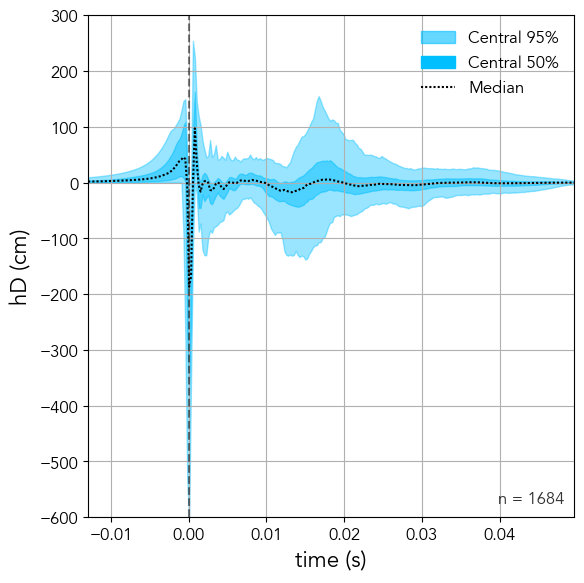

In [5]:
ccsn_dataset = CCSNData(noise=True, curriculum=False)
ccsn_dataset.plot_signal_distribution(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


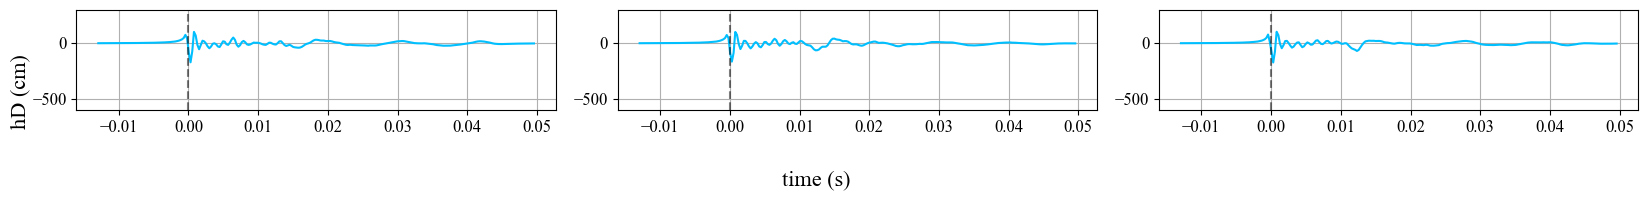

In [6]:
ccsn_dataset.plot_signal_grid(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.svg")

In [7]:
toy=False

### Train VAE + Flow


Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A_300', 'A_467', 'A_634', 'A_1268', 'A_10000']
First few parameter values:
   beta1_IC_b  A_300  A_467  A_634  A_1268  A_10000
1    0.000749  False  False   True   False    False
2    0.002987  False  False   True   False    False
3    0.006661  False  False   True   False    False
4    0.011734  False  False   True   False    False
5    0.017965  False  False   True   False    False

Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A_300', 'A_467', 'A_634', 'A_1268', 'A_10000']
First few parameter values:
   beta1_IC_b  A_300  A_467  A_634  A_1268  A_10000
1    0.000749  False  False   True   False    False
2    0.002987  False  False   True   False    False
3    0.006661  False  False   True   False    False
4    0.011734  False  False   True   False    False
5    0.017965  False  False   True   False  

Epochs:   0%|          | 0/256 [00:00<?, ?it/s]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1

Epoch 1/256 | Train Loss: 153.3904 | Val Loss: 76.3268


Epochs:   1%|          | 2/256 [00:08<18:38,  4.40s/it]

Epoch 2/256 | Train Loss: 63.1856 | Val Loss: 57.7326


Epochs:   1%|          | 3/256 [00:12<17:36,  4.18s/it]

Epoch 3/256 | Train Loss: 53.6810 | Val Loss: 50.7609


Epochs:   2%|▏         | 4/256 [00:16<17:00,  4.05s/it]

Epoch 4/256 | Train Loss: 50.0852 | Val Loss: 48.3071


Epochs:   2%|▏         | 5/256 [00:20<16:56,  4.05s/it]

Epoch 5/256 | Train Loss: 48.2304 | Val Loss: 46.0981


Epochs:   2%|▏         | 6/256 [00:24<16:54,  4.06s/it]

Epoch 6/256 | Train Loss: 46.2753 | Val Loss: 44.2168


Epochs:   3%|▎         | 7/256 [00:28<16:39,  4.02s/it]

Epoch 7/256 | Train Loss: 44.3338 | Val Loss: 42.3232


Epochs:   3%|▎         | 8/256 [00:32<16:20,  3.95s/it]

Epoch 8/256 | Train Loss: 43.7880 | Val Loss: 41.8125


Epochs:   4%|▎         | 9/256 [00:36<16:08,  3.92s/it]

Epoch 9/256 | Train Loss: 42.5500 | Val Loss: 41.5626


Epochs:   4%|▍         | 10/256 [00:40<15:56,  3.89s/it]

Epoch 10/256 | Train Loss: 41.9598 | Val Loss: 39.9136


Epochs:   4%|▍         | 11/256 [00:43<15:43,  3.85s/it]

Epoch 11/256 | Train Loss: 40.5851 | Val Loss: 39.1721


Epochs:   5%|▍         | 12/256 [00:47<15:33,  3.83s/it]

Epoch 12/256 | Train Loss: 39.9124 | Val Loss: 38.2218


Epochs:   5%|▌         | 13/256 [00:51<15:25,  3.81s/it]

Epoch 13/256 | Train Loss: 39.3311 | Val Loss: 38.4986


Epochs:   5%|▌         | 14/256 [00:55<15:20,  3.81s/it]

Epoch 14/256 | Train Loss: 38.6026 | Val Loss: 38.2289


Epochs:   6%|▌         | 15/256 [00:59<15:13,  3.79s/it]

Epoch 15/256 | Train Loss: 38.7776 | Val Loss: 37.6824
Epoch 16/256 | Train Loss: 38.2028 | Val Loss: 36.9281
Generated signals shape: (32, 256)
Epoch 16/256 | Train Loss: 38.2028 | Val Loss: 36.9281
Generated signals shape: (32, 256)


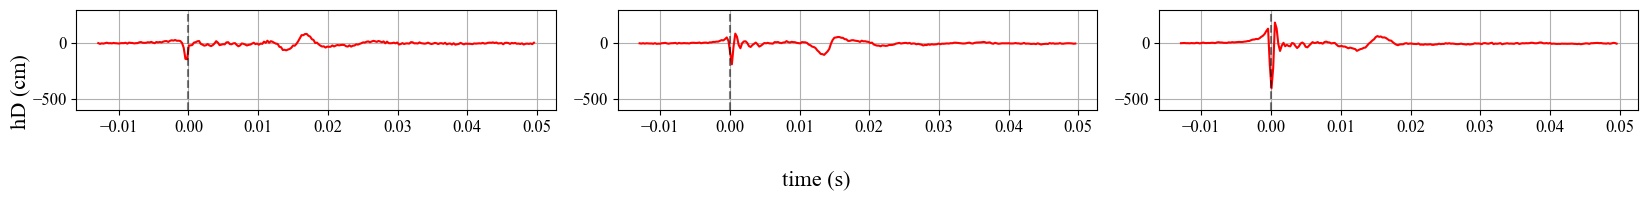

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


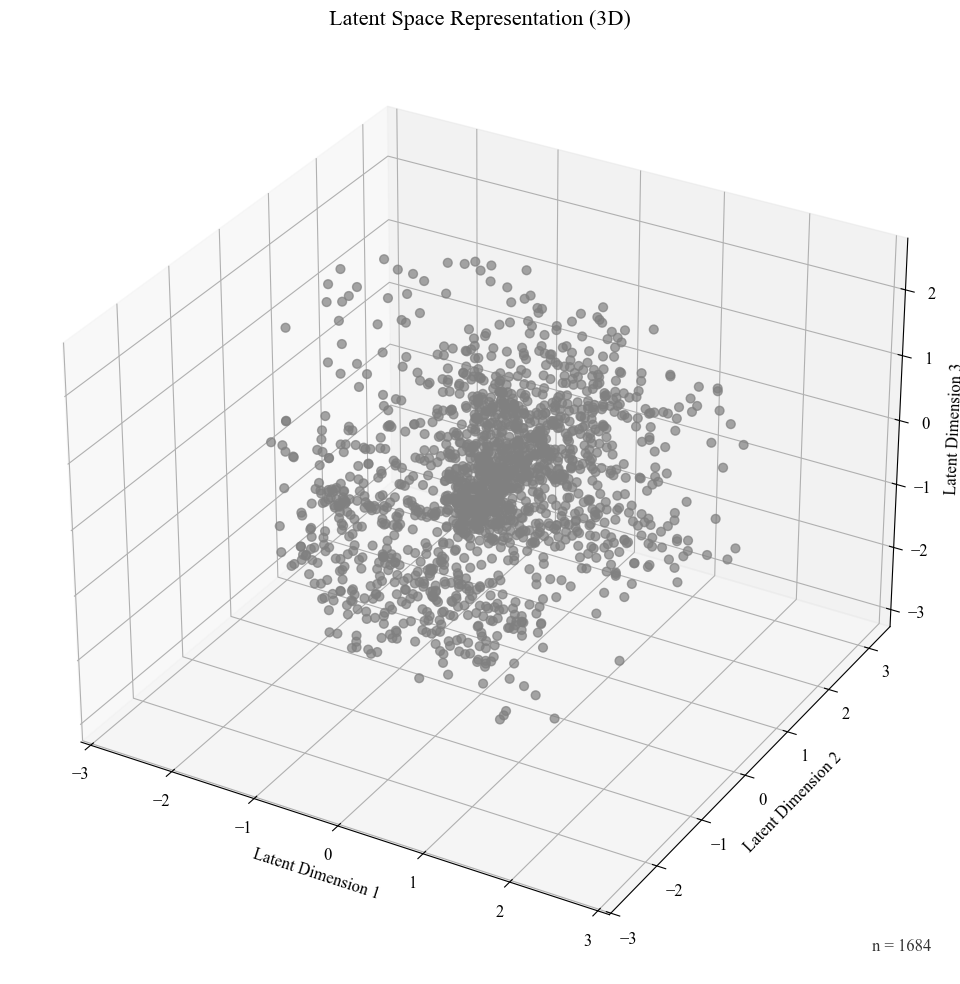

Epochs:   6%|▋         | 16/256 [01:04<17:23,  4.35s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 17/256 | Train Loss: 37.2752 | Val Loss: 35.0726


Epochs:   7%|▋         | 18/256 [01:12<16:21,  4.12s/it]

Epoch 18/256 | Train Loss: 36.8698 | Val Loss: 36.0674


Epochs:   7%|▋         | 19/256 [01:16<15:53,  4.02s/it]

Epoch 19/256 | Train Loss: 37.0772 | Val Loss: 35.4046


Epochs:   8%|▊         | 20/256 [01:20<15:38,  3.98s/it]

Epoch 20/256 | Train Loss: 36.9130 | Val Loss: 35.4797


Epochs:   8%|▊         | 21/256 [01:24<15:27,  3.95s/it]

Epoch 21/256 | Train Loss: 35.9801 | Val Loss: 34.4233


Epochs:   9%|▊         | 22/256 [01:27<15:16,  3.91s/it]

Epoch 22/256 | Train Loss: 35.6383 | Val Loss: 33.9253


Epochs:   9%|▉         | 23/256 [01:31<15:13,  3.92s/it]

Epoch 23/256 | Train Loss: 35.3419 | Val Loss: 34.3150


Epochs:   9%|▉         | 24/256 [01:35<15:02,  3.89s/it]

Epoch 24/256 | Train Loss: 35.3307 | Val Loss: 33.7246


Epochs:  10%|▉         | 25/256 [01:39<14:56,  3.88s/it]

Epoch 25/256 | Train Loss: 35.2531 | Val Loss: 34.1159


Epochs:  10%|█         | 26/256 [01:43<15:01,  3.92s/it]

Epoch 26/256 | Train Loss: 34.7073 | Val Loss: 33.8310


Epochs:  11%|█         | 27/256 [01:47<14:57,  3.92s/it]

Epoch 27/256 | Train Loss: 34.4432 | Val Loss: 33.0308


Epochs:  11%|█         | 28/256 [01:51<14:45,  3.88s/it]

Epoch 28/256 | Train Loss: 34.5201 | Val Loss: 33.3228


Epochs:  11%|█▏        | 29/256 [01:55<14:39,  3.87s/it]

Epoch 29/256 | Train Loss: 34.3806 | Val Loss: 33.1898


Epochs:  12%|█▏        | 30/256 [01:58<14:26,  3.84s/it]

Epoch 30/256 | Train Loss: 34.8328 | Val Loss: 33.4472


Epochs:  12%|█▏        | 31/256 [02:02<14:17,  3.81s/it]

Epoch 31/256 | Train Loss: 34.2237 | Val Loss: 32.2130
Epoch 32/256 | Train Loss: 34.0455 | Val Loss: 33.2221
Generated signals shape: (32, 256)
Epoch 32/256 | Train Loss: 34.0455 | Val Loss: 33.2221
Generated signals shape: (32, 256)


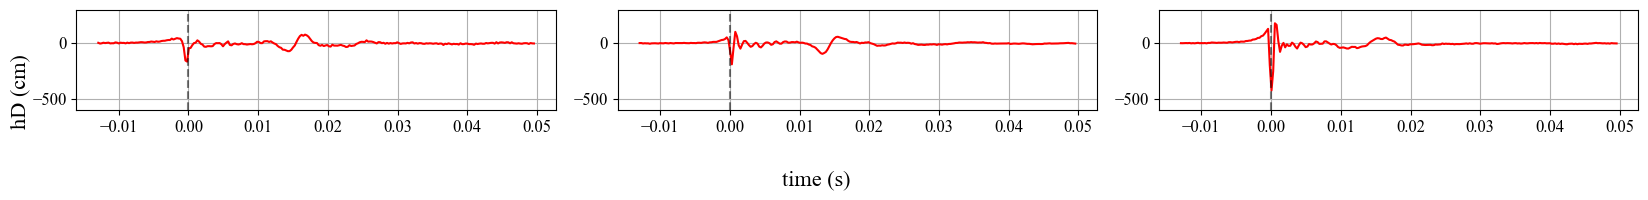

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


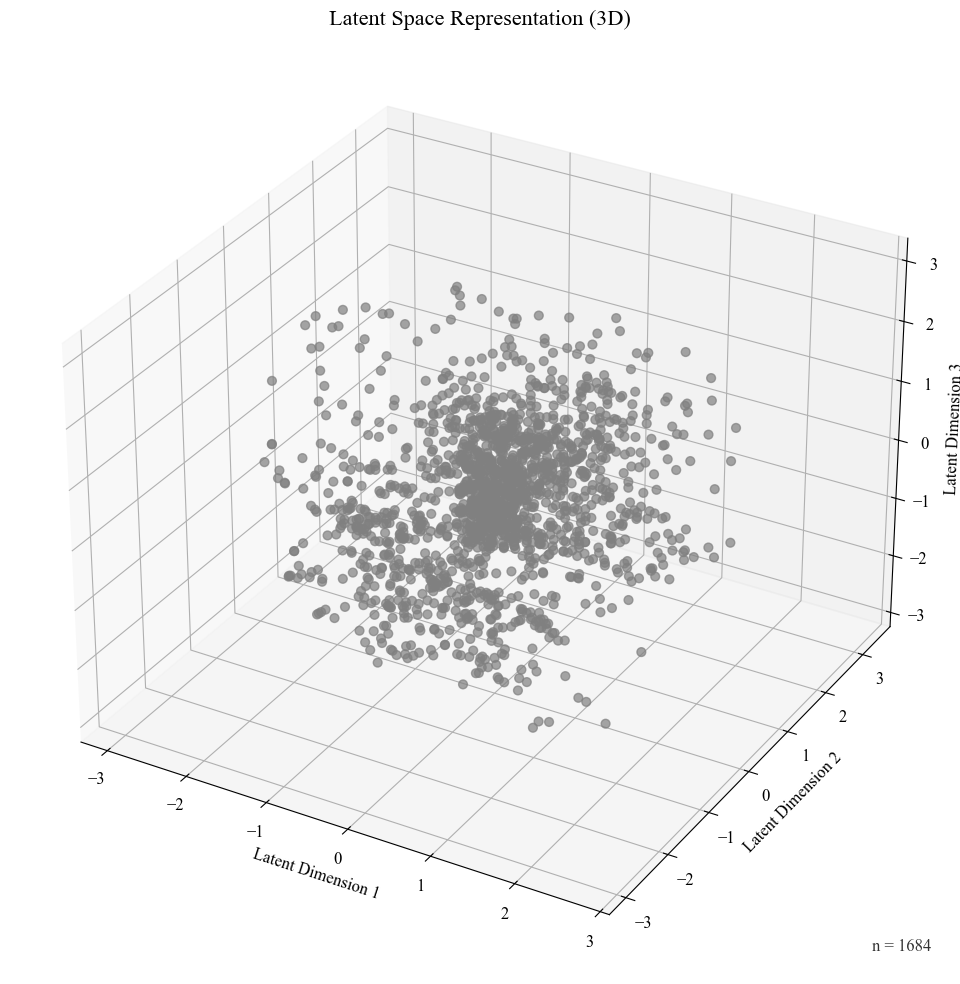

Epochs:  12%|█▎        | 32/256 [02:08<16:39,  4.46s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 33/256 | Train Loss: 33.7970 | Val Loss: 32.0233


Epochs:  13%|█▎        | 34/256 [02:16<15:24,  4.17s/it]

Epoch 34/256 | Train Loss: 33.6907 | Val Loss: 32.1804


Epochs:  14%|█▎        | 35/256 [02:20<14:58,  4.06s/it]

Epoch 35/256 | Train Loss: 33.6039 | Val Loss: 32.0896


Epochs:  14%|█▍        | 36/256 [02:23<14:35,  3.98s/it]

Epoch 36/256 | Train Loss: 33.3952 | Val Loss: 31.7398


Epochs:  14%|█▍        | 37/256 [02:27<14:15,  3.91s/it]

Epoch 37/256 | Train Loss: 33.3110 | Val Loss: 31.9561


Epochs:  15%|█▍        | 38/256 [02:31<13:49,  3.80s/it]

Epoch 38/256 | Train Loss: 33.2693 | Val Loss: 32.4135


Epochs:  15%|█▌        | 39/256 [02:34<13:29,  3.73s/it]

Epoch 39/256 | Train Loss: 32.9254 | Val Loss: 31.9816


Epochs:  16%|█▌        | 40/256 [02:38<13:34,  3.77s/it]

Epoch 40/256 | Train Loss: 32.8292 | Val Loss: 30.7846


Epochs:  16%|█▌        | 41/256 [02:42<13:37,  3.80s/it]

Epoch 41/256 | Train Loss: 32.6492 | Val Loss: 31.7960


Epochs:  16%|█▋        | 42/256 [02:46<13:41,  3.84s/it]

Epoch 42/256 | Train Loss: 32.6309 | Val Loss: 31.2658


Epochs:  17%|█▋        | 43/256 [02:50<13:30,  3.80s/it]

Epoch 43/256 | Train Loss: 32.4464 | Val Loss: 31.3788


Epochs:  17%|█▋        | 44/256 [02:54<13:26,  3.81s/it]

Epoch 44/256 | Train Loss: 32.3935 | Val Loss: 31.1473


Epochs:  18%|█▊        | 45/256 [02:57<13:26,  3.82s/it]

Epoch 45/256 | Train Loss: 32.5628 | Val Loss: 31.1227


Epochs:  18%|█▊        | 46/256 [03:01<13:29,  3.85s/it]

Epoch 46/256 | Train Loss: 32.0806 | Val Loss: 31.0651


Epochs:  18%|█▊        | 47/256 [03:05<13:29,  3.87s/it]

Epoch 47/256 | Train Loss: 32.1369 | Val Loss: 31.6047
Epoch 48/256 | Train Loss: 32.3268 | Val Loss: 30.9148
Generated signals shape: (32, 256)
Epoch 48/256 | Train Loss: 32.3268 | Val Loss: 30.9148
Generated signals shape: (32, 256)


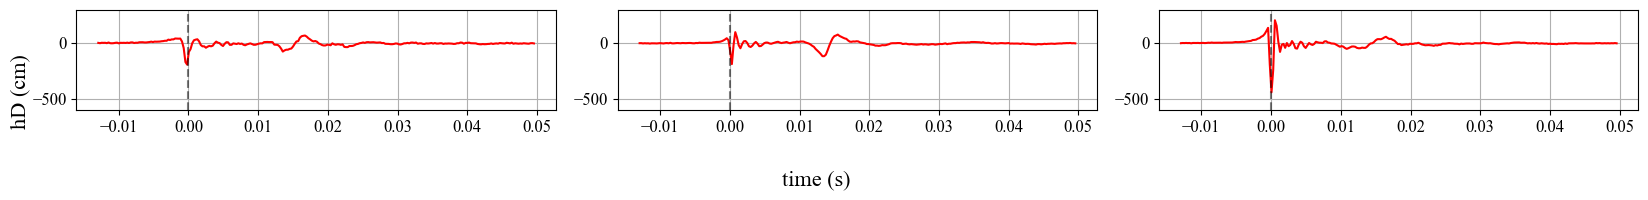

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


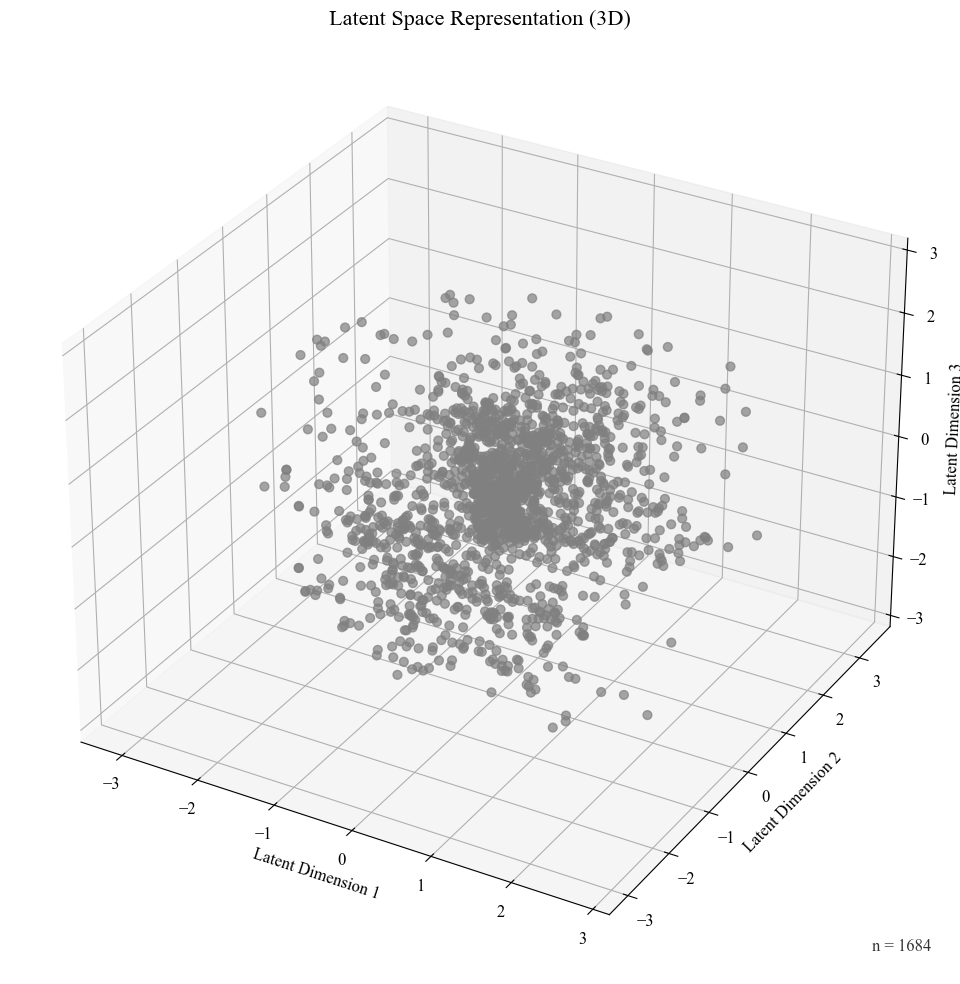

Epochs:  19%|█▉        | 48/256 [03:11<15:41,  4.52s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 49/256 | Train Loss: 32.1549 | Val Loss: 30.1396


Epochs:  20%|█▉        | 50/256 [03:20<15:13,  4.43s/it]

Epoch 50/256 | Train Loss: 31.8327 | Val Loss: 30.4296


Epochs:  20%|█▉        | 51/256 [03:24<14:36,  4.27s/it]

Epoch 51/256 | Train Loss: 31.8100 | Val Loss: 30.3343


Epochs:  20%|██        | 52/256 [03:28<14:14,  4.19s/it]

Epoch 52/256 | Train Loss: 31.6874 | Val Loss: 31.0655


Epochs:  21%|██        | 53/256 [03:32<13:53,  4.11s/it]

Epoch 53/256 | Train Loss: 31.9099 | Val Loss: 30.5753


Epochs:  21%|██        | 54/256 [03:36<13:37,  4.05s/it]

Epoch 54/256 | Train Loss: 31.3493 | Val Loss: 30.2988


Epochs:  21%|██▏       | 55/256 [03:40<13:35,  4.06s/it]

Epoch 55/256 | Train Loss: 31.8290 | Val Loss: 30.9162


Epochs:  22%|██▏       | 56/256 [03:43<13:11,  3.96s/it]

Epoch 56/256 | Train Loss: 31.7397 | Val Loss: 29.7128


Epochs:  22%|██▏       | 57/256 [03:47<12:59,  3.92s/it]

Epoch 57/256 | Train Loss: 31.3583 | Val Loss: 30.1829


Epochs:  23%|██▎       | 58/256 [03:51<12:49,  3.88s/it]

Epoch 58/256 | Train Loss: 31.0512 | Val Loss: 30.3524


Epochs:  23%|██▎       | 59/256 [03:55<12:51,  3.91s/it]

Epoch 59/256 | Train Loss: 31.3539 | Val Loss: 30.0037


Epochs:  23%|██▎       | 60/256 [03:59<12:45,  3.91s/it]

Epoch 60/256 | Train Loss: 31.3431 | Val Loss: 29.6253


Epochs:  24%|██▍       | 61/256 [04:03<12:44,  3.92s/it]

Epoch 61/256 | Train Loss: 30.8910 | Val Loss: 29.7371


Epochs:  24%|██▍       | 62/256 [04:07<12:39,  3.92s/it]

Epoch 62/256 | Train Loss: 30.9987 | Val Loss: 29.5292


Epochs:  25%|██▍       | 63/256 [04:11<12:34,  3.91s/it]

Epoch 63/256 | Train Loss: 30.9726 | Val Loss: 29.4526
Epoch 64/256 | Train Loss: 31.0288 | Val Loss: 29.5532
Generated signals shape: (32, 256)
Epoch 64/256 | Train Loss: 31.0288 | Val Loss: 29.5532
Generated signals shape: (32, 256)


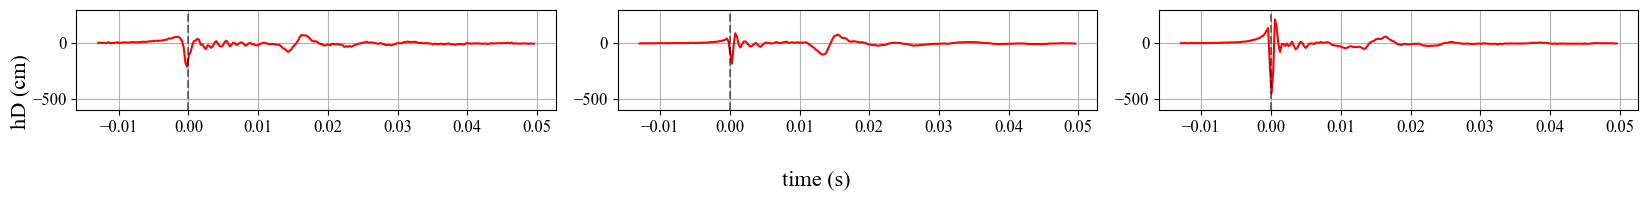

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


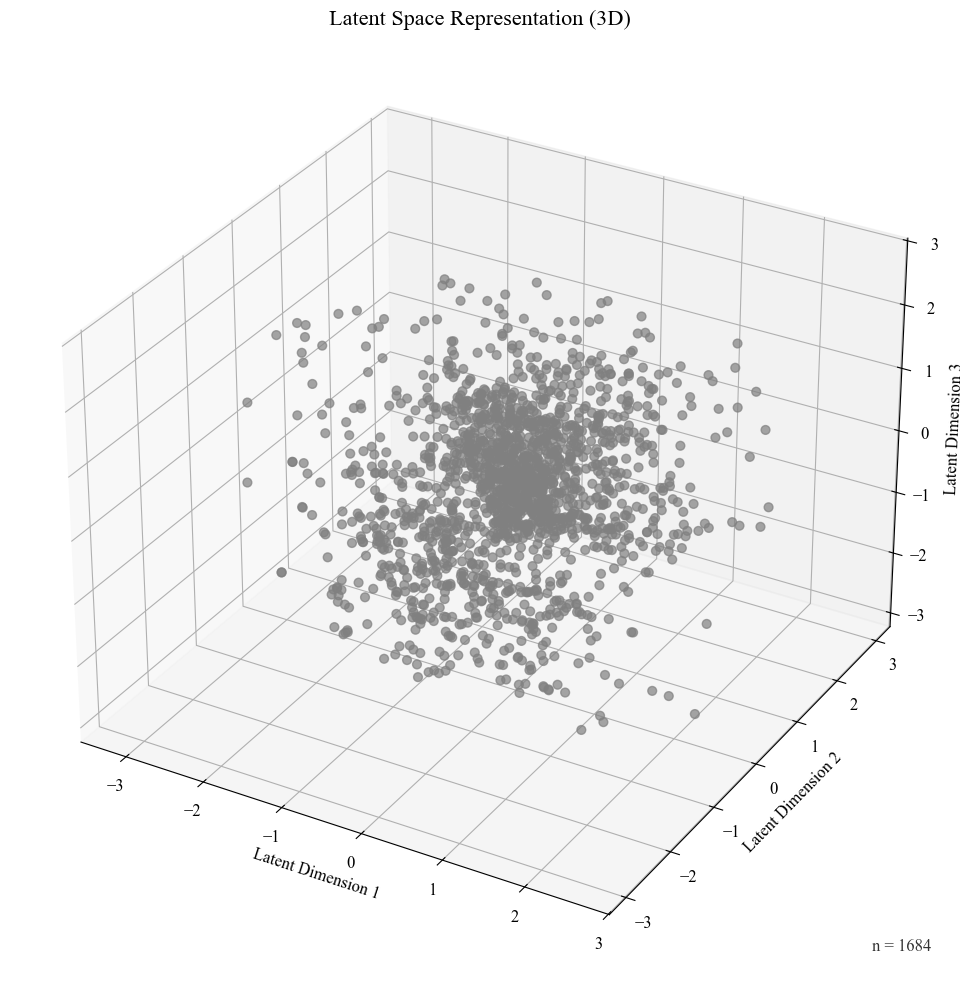

Epochs:  25%|██▌       | 64/256 [04:17<14:35,  4.56s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 65/256 | Train Loss: 30.6596 | Val Loss: 29.1998


Epochs:  26%|██▌       | 66/256 [04:25<13:18,  4.20s/it]

Epoch 66/256 | Train Loss: 30.9971 | Val Loss: 29.3592


Epochs:  26%|██▌       | 67/256 [04:28<12:55,  4.10s/it]

Epoch 67/256 | Train Loss: 30.6365 | Val Loss: 29.9428


Epochs:  27%|██▋       | 68/256 [04:32<12:42,  4.05s/it]

Epoch 68/256 | Train Loss: 30.7993 | Val Loss: 29.1792


Epochs:  27%|██▋       | 69/256 [04:36<12:30,  4.01s/it]

Epoch 69/256 | Train Loss: 30.4553 | Val Loss: 29.3823


Epochs:  27%|██▋       | 70/256 [04:40<12:20,  3.98s/it]

Epoch 70/256 | Train Loss: 30.2749 | Val Loss: 28.5442


Epochs:  28%|██▊       | 71/256 [04:44<12:14,  3.97s/it]

Epoch 71/256 | Train Loss: 30.2684 | Val Loss: 29.1995


Epochs:  28%|██▊       | 72/256 [04:48<12:11,  3.97s/it]

Epoch 72/256 | Train Loss: 30.7056 | Val Loss: 28.9276


Epochs:  29%|██▊       | 73/256 [04:52<12:04,  3.96s/it]

Epoch 73/256 | Train Loss: 30.2027 | Val Loss: 29.1634


Epochs:  29%|██▉       | 74/256 [04:56<12:02,  3.97s/it]

Epoch 74/256 | Train Loss: 30.3146 | Val Loss: 28.5541


Epochs:  29%|██▉       | 75/256 [05:00<11:55,  3.95s/it]

Epoch 75/256 | Train Loss: 30.0428 | Val Loss: 29.2268


Epochs:  30%|██▉       | 76/256 [05:04<11:47,  3.93s/it]

Epoch 76/256 | Train Loss: 30.4824 | Val Loss: 29.0515


Epochs:  30%|███       | 77/256 [05:08<11:45,  3.94s/it]

Epoch 77/256 | Train Loss: 29.9832 | Val Loss: 29.0507


Epochs:  30%|███       | 78/256 [05:12<11:47,  3.97s/it]

Epoch 78/256 | Train Loss: 30.2434 | Val Loss: 28.9265


Epochs:  31%|███       | 79/256 [05:16<11:45,  3.99s/it]

Epoch 79/256 | Train Loss: 30.1376 | Val Loss: 28.5447
Epoch 80/256 | Train Loss: 30.0585 | Val Loss: 28.3276
Generated signals shape: (32, 256)
Epoch 80/256 | Train Loss: 30.0585 | Val Loss: 28.3276
Generated signals shape: (32, 256)


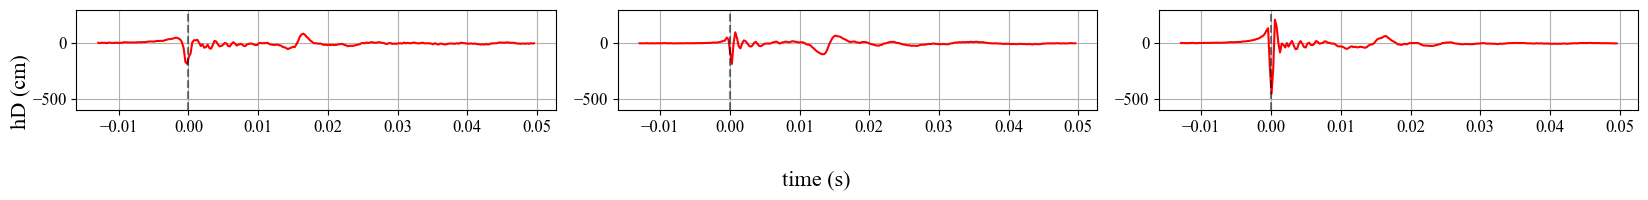

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


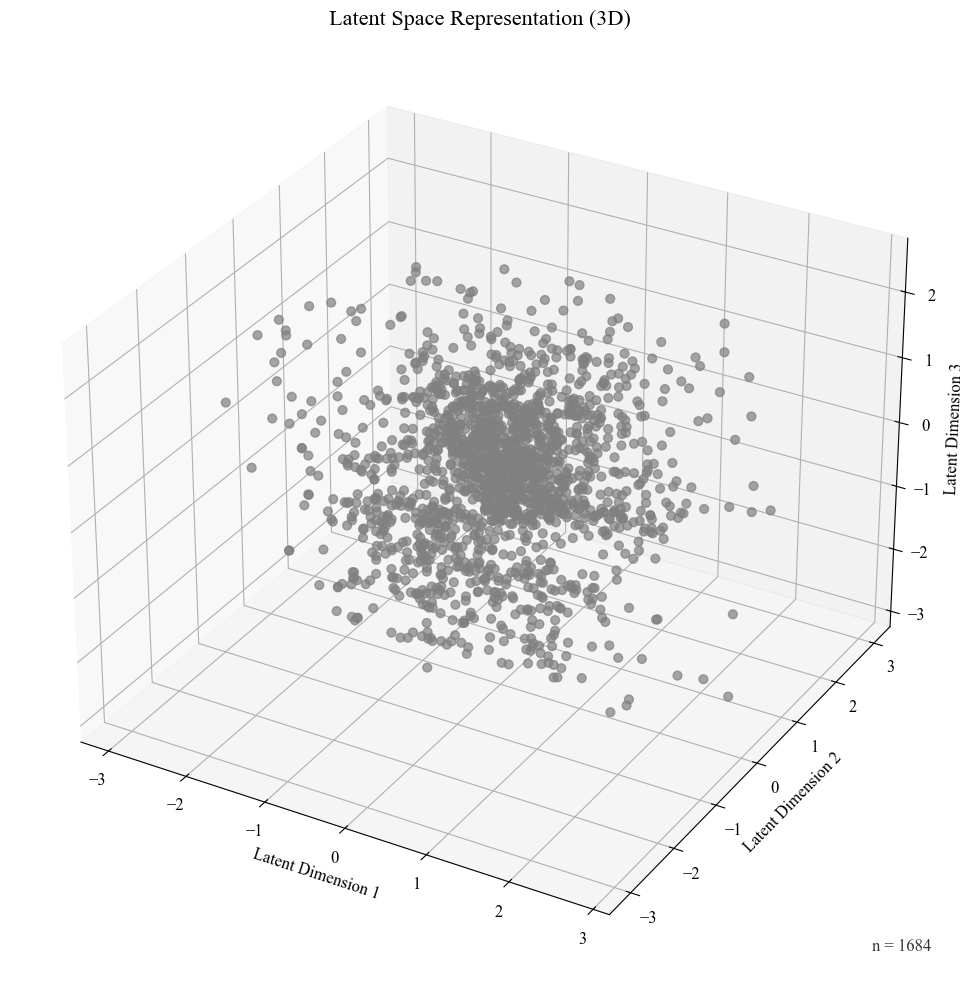

Epochs:  31%|███▏      | 80/256 [05:22<13:31,  4.61s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 81/256 | Train Loss: 30.0660 | Val Loss: 28.6420


Epochs:  32%|███▏      | 82/256 [05:30<12:17,  4.24s/it]

Epoch 82/256 | Train Loss: 29.8947 | Val Loss: 29.3017


Epochs:  32%|███▏      | 83/256 [05:34<11:55,  4.13s/it]

Epoch 83/256 | Train Loss: 30.0756 | Val Loss: 28.5706


Epochs:  33%|███▎      | 84/256 [05:37<11:38,  4.06s/it]

Epoch 84/256 | Train Loss: 29.8361 | Val Loss: 28.0907


Epochs:  33%|███▎      | 85/256 [05:41<11:25,  4.01s/it]

Epoch 85/256 | Train Loss: 29.8829 | Val Loss: 28.1207


Epochs:  34%|███▎      | 86/256 [05:46<11:39,  4.11s/it]

Epoch 86/256 | Train Loss: 29.7304 | Val Loss: 28.1164


Epochs:  34%|███▍      | 87/256 [05:50<11:46,  4.18s/it]

Epoch 87/256 | Train Loss: 29.4826 | Val Loss: 28.5591


Epochs:  34%|███▍      | 88/256 [05:54<11:35,  4.14s/it]

Epoch 88/256 | Train Loss: 29.7728 | Val Loss: 28.3015


Epochs:  35%|███▍      | 89/256 [05:58<11:20,  4.07s/it]

Epoch 89/256 | Train Loss: 29.5053 | Val Loss: 28.3260


Epochs:  35%|███▌      | 90/256 [06:02<11:07,  4.02s/it]

Epoch 90/256 | Train Loss: 29.6086 | Val Loss: 28.0404


Epochs:  36%|███▌      | 91/256 [06:06<10:55,  3.97s/it]

Epoch 91/256 | Train Loss: 29.7303 | Val Loss: 28.4739


Epochs:  36%|███▌      | 92/256 [06:10<10:41,  3.91s/it]

Epoch 92/256 | Train Loss: 29.6556 | Val Loss: 27.9575


Epochs:  36%|███▋      | 93/256 [06:13<10:33,  3.89s/it]

Epoch 93/256 | Train Loss: 29.4393 | Val Loss: 28.8623


Epochs:  37%|███▋      | 94/256 [06:17<10:30,  3.89s/it]

Epoch 94/256 | Train Loss: 29.3855 | Val Loss: 27.6083


Epochs:  37%|███▋      | 95/256 [06:21<10:25,  3.88s/it]

Epoch 95/256 | Train Loss: 29.5389 | Val Loss: 27.5226
Epoch 96/256 | Train Loss: 29.2852 | Val Loss: 28.1020
Generated signals shape: (32, 256)
Epoch 96/256 | Train Loss: 29.2852 | Val Loss: 28.1020
Generated signals shape: (32, 256)


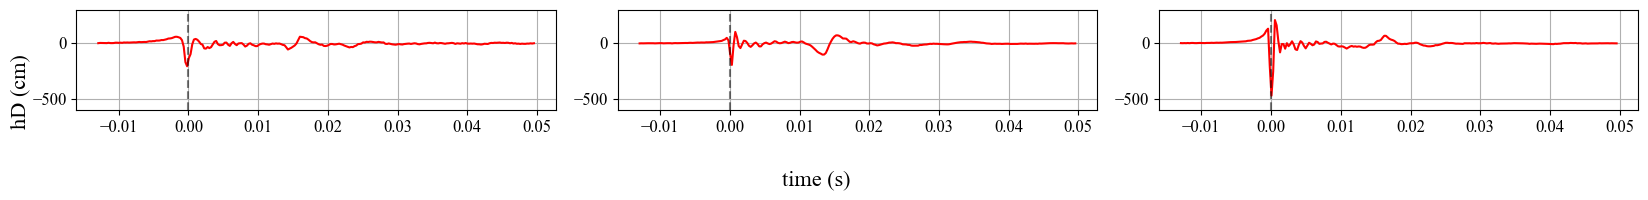

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


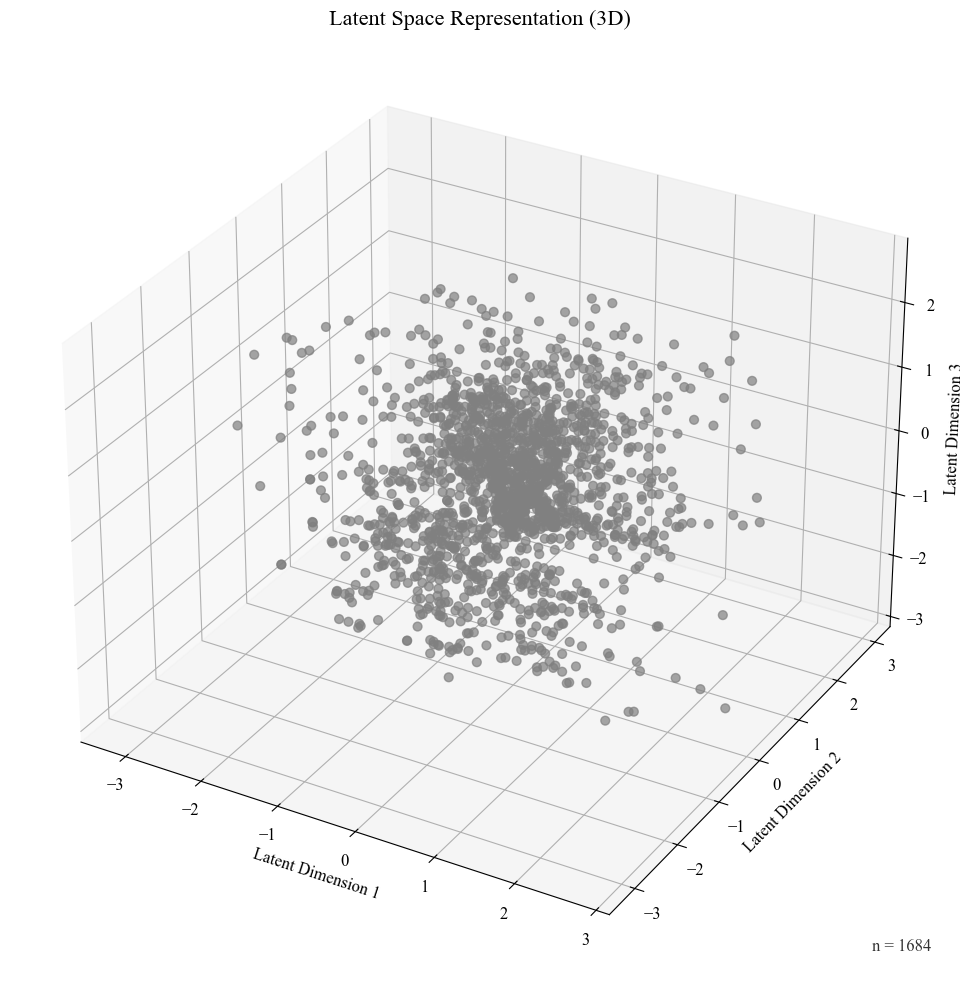

Epochs:  38%|███▊      | 96/256 [06:27<11:57,  4.49s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 97/256 | Train Loss: 29.2499 | Val Loss: 28.4434


Epochs:  38%|███▊      | 98/256 [06:35<10:55,  4.15s/it]

Epoch 98/256 | Train Loss: 29.3602 | Val Loss: 27.9240


Epochs:  39%|███▊      | 99/256 [06:38<10:35,  4.04s/it]

Epoch 99/256 | Train Loss: 29.2917 | Val Loss: 27.9253


Epochs:  39%|███▉      | 100/256 [06:42<10:21,  3.98s/it]

Epoch 100/256 | Train Loss: 29.2723 | Val Loss: 27.7176


Epochs:  39%|███▉      | 101/256 [06:46<10:15,  3.97s/it]

Epoch 101/256 | Train Loss: 28.9735 | Val Loss: 28.3062


Epochs:  40%|███▉      | 102/256 [06:51<10:29,  4.08s/it]

Epoch 102/256 | Train Loss: 29.0130 | Val Loss: 27.1954


Epochs:  40%|████      | 103/256 [06:55<10:20,  4.05s/it]

Epoch 103/256 | Train Loss: 28.9559 | Val Loss: 27.7578


Epochs:  41%|████      | 104/256 [06:58<10:09,  4.01s/it]

Epoch 104/256 | Train Loss: 28.9963 | Val Loss: 27.2340


Epochs:  41%|████      | 105/256 [07:03<10:19,  4.10s/it]

Epoch 105/256 | Train Loss: 28.9879 | Val Loss: 27.2721


Epochs:  41%|████▏     | 106/256 [07:07<10:26,  4.18s/it]

Epoch 106/256 | Train Loss: 29.0575 | Val Loss: 27.8370


Epochs:  42%|████▏     | 107/256 [07:11<10:00,  4.03s/it]

Epoch 107/256 | Train Loss: 29.1117 | Val Loss: 27.0231


Epochs:  42%|████▏     | 108/256 [07:15<09:45,  3.95s/it]

Epoch 108/256 | Train Loss: 28.7590 | Val Loss: 27.6550


Epochs:  43%|████▎     | 109/256 [07:18<09:26,  3.85s/it]

Epoch 109/256 | Train Loss: 28.9999 | Val Loss: 27.4298


Epochs:  43%|████▎     | 110/256 [07:22<09:11,  3.78s/it]

Epoch 110/256 | Train Loss: 28.8075 | Val Loss: 27.0292


Epochs:  43%|████▎     | 111/256 [07:25<09:00,  3.73s/it]

Epoch 111/256 | Train Loss: 28.8553 | Val Loss: 27.4733
Epoch 112/256 | Train Loss: 28.9961 | Val Loss: 27.4264
Generated signals shape: (32, 256)
Epoch 112/256 | Train Loss: 28.9961 | Val Loss: 27.4264
Generated signals shape: (32, 256)


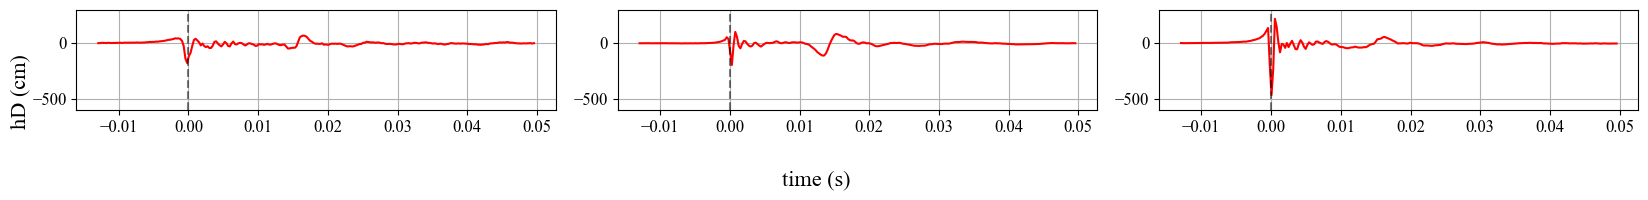

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


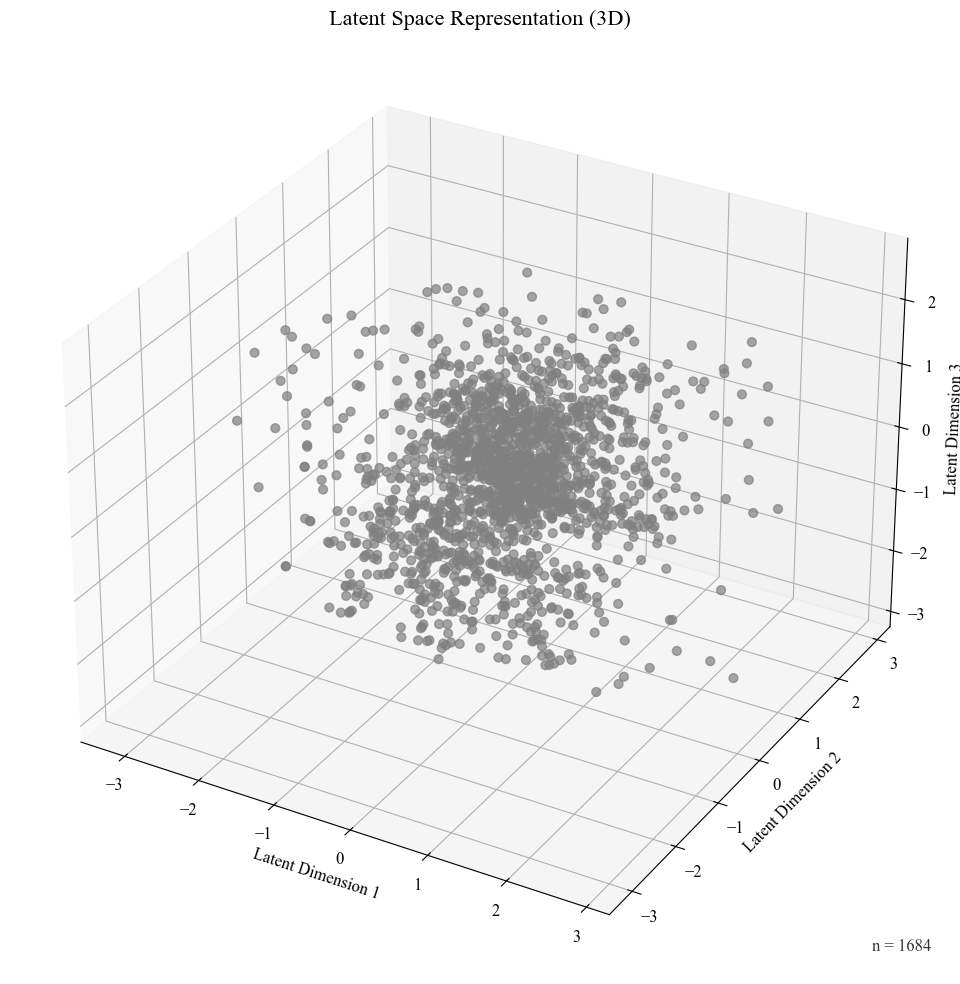

Epochs:  44%|████▍     | 112/256 [07:31<10:19,  4.30s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 113/256 | Train Loss: 28.8957 | Val Loss: 27.1681


Epochs:  45%|████▍     | 114/256 [07:38<09:23,  3.97s/it]

Epoch 114/256 | Train Loss: 28.5500 | Val Loss: 27.4945


Epochs:  45%|████▍     | 115/256 [07:42<09:04,  3.86s/it]

Epoch 115/256 | Train Loss: 28.8447 | Val Loss: 26.8008


Epochs:  45%|████▌     | 116/256 [07:46<08:49,  3.78s/it]

Epoch 116/256 | Train Loss: 28.5560 | Val Loss: 26.8917


Epochs:  46%|████▌     | 117/256 [07:49<08:38,  3.73s/it]

Epoch 117/256 | Train Loss: 28.4157 | Val Loss: 27.0446


Epochs:  46%|████▌     | 118/256 [07:53<08:29,  3.69s/it]

Epoch 118/256 | Train Loss: 28.7194 | Val Loss: 27.0571


Epochs:  46%|████▋     | 119/256 [07:56<08:22,  3.67s/it]

Epoch 119/256 | Train Loss: 28.5999 | Val Loss: 26.7184


Epochs:  47%|████▋     | 120/256 [08:00<08:17,  3.66s/it]

Epoch 120/256 | Train Loss: 28.7417 | Val Loss: 27.5057


Epochs:  47%|████▋     | 121/256 [08:04<08:15,  3.67s/it]

Epoch 121/256 | Train Loss: 28.7507 | Val Loss: 27.3068


Epochs:  48%|████▊     | 122/256 [08:07<08:08,  3.65s/it]

Epoch 122/256 | Train Loss: 28.6492 | Val Loss: 27.0476


Epochs:  48%|████▊     | 123/256 [08:11<08:04,  3.64s/it]

Epoch 123/256 | Train Loss: 28.5394 | Val Loss: 27.0417


Epochs:  48%|████▊     | 124/256 [08:15<08:02,  3.66s/it]

Epoch 124/256 | Train Loss: 28.2617 | Val Loss: 27.0029


Epochs:  49%|████▉     | 125/256 [08:18<07:55,  3.63s/it]

Epoch 125/256 | Train Loss: 28.4397 | Val Loss: 27.1868


Epochs:  49%|████▉     | 126/256 [08:22<07:50,  3.62s/it]

Epoch 126/256 | Train Loss: 28.3684 | Val Loss: 26.6272


Epochs:  50%|████▉     | 127/256 [08:25<07:43,  3.59s/it]

Epoch 127/256 | Train Loss: 28.2673 | Val Loss: 27.1548
Epoch 128/256 | Train Loss: 28.4456 | Val Loss: 27.4402
Generated signals shape: (32, 256)
Epoch 128/256 | Train Loss: 28.4456 | Val Loss: 27.4402
Generated signals shape: (32, 256)


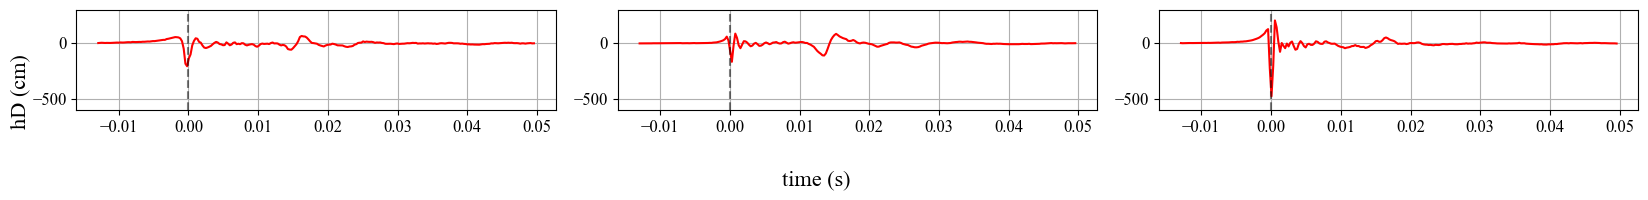

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


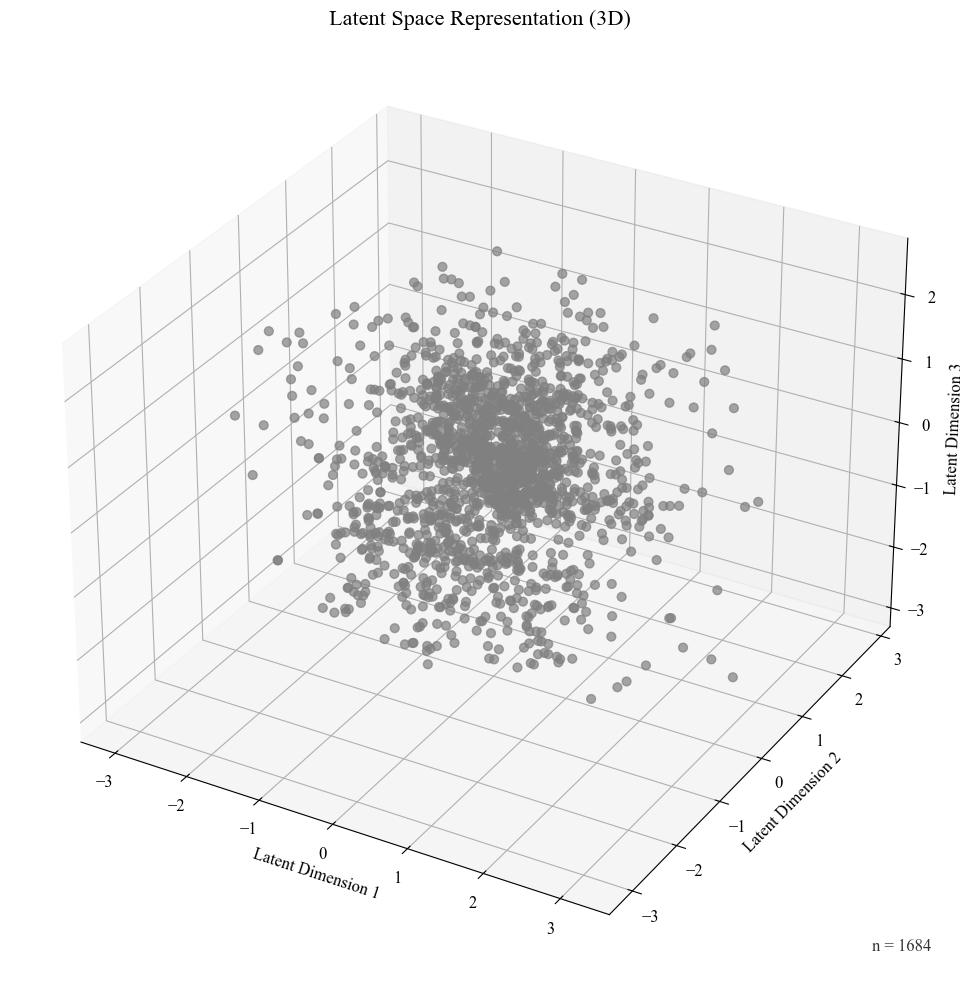

Epochs:  50%|█████     | 128/256 [08:31<08:49,  4.14s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 129/256 | Train Loss: 28.4783 | Val Loss: 27.1474


Epochs:  51%|█████     | 130/256 [08:38<08:10,  3.90s/it]

Epoch 130/256 | Train Loss: 28.1984 | Val Loss: 26.8728


Epochs:  51%|█████     | 131/256 [08:42<07:56,  3.81s/it]

Epoch 131/256 | Train Loss: 28.2997 | Val Loss: 26.9983


Epochs:  52%|█████▏    | 132/256 [08:45<07:45,  3.75s/it]

Epoch 132/256 | Train Loss: 28.4343 | Val Loss: 27.2193


Epochs:  52%|█████▏    | 133/256 [08:49<07:33,  3.69s/it]

Epoch 133/256 | Train Loss: 28.1104 | Val Loss: 26.3738


Epochs:  52%|█████▏    | 134/256 [08:52<07:28,  3.68s/it]

Epoch 134/256 | Train Loss: 28.1131 | Val Loss: 26.5974


Epochs:  53%|█████▎    | 135/256 [08:56<07:20,  3.64s/it]

Epoch 135/256 | Train Loss: 28.0996 | Val Loss: 27.4560


Epochs:  53%|█████▎    | 136/256 [09:00<07:19,  3.66s/it]

Epoch 136/256 | Train Loss: 28.3202 | Val Loss: 27.0255


Epochs:  54%|█████▎    | 137/256 [09:04<07:29,  3.78s/it]

Epoch 137/256 | Train Loss: 28.3833 | Val Loss: 26.3709


Epochs:  54%|█████▍    | 138/256 [09:08<07:30,  3.82s/it]

Epoch 138/256 | Train Loss: 27.9286 | Val Loss: 26.8181


Epochs:  54%|█████▍    | 139/256 [09:12<07:35,  3.89s/it]

Epoch 139/256 | Train Loss: 28.1505 | Val Loss: 26.9486


Epochs:  55%|█████▍    | 140/256 [09:16<07:52,  4.07s/it]

Epoch 140/256 | Train Loss: 28.1062 | Val Loss: 26.8744


Epochs:  55%|█████▌    | 141/256 [09:20<07:35,  3.96s/it]

Epoch 141/256 | Train Loss: 28.1390 | Val Loss: 26.7441


Epochs:  55%|█████▌    | 142/256 [09:24<07:25,  3.91s/it]

Epoch 142/256 | Train Loss: 28.2658 | Val Loss: 26.5483


Epochs:  56%|█████▌    | 143/256 [09:28<07:19,  3.89s/it]

Epoch 143/256 | Train Loss: 28.0700 | Val Loss: 26.4117
Epoch 144/256 | Train Loss: 28.0037 | Val Loss: 26.2662
Generated signals shape: (32, 256)
Epoch 144/256 | Train Loss: 28.0037 | Val Loss: 26.2662
Generated signals shape: (32, 256)


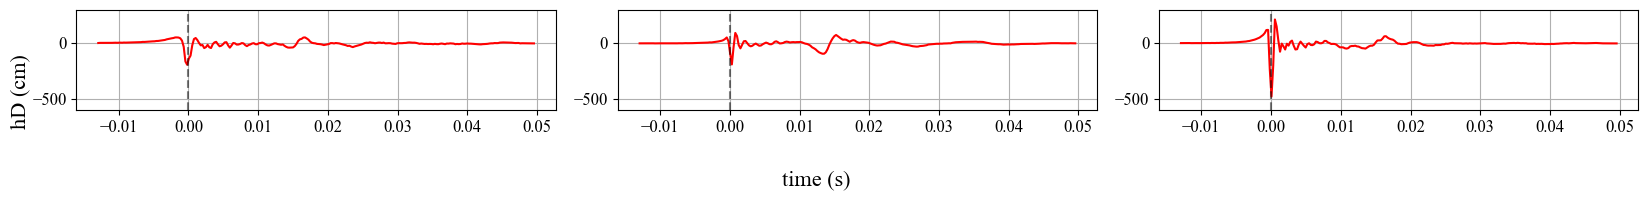

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


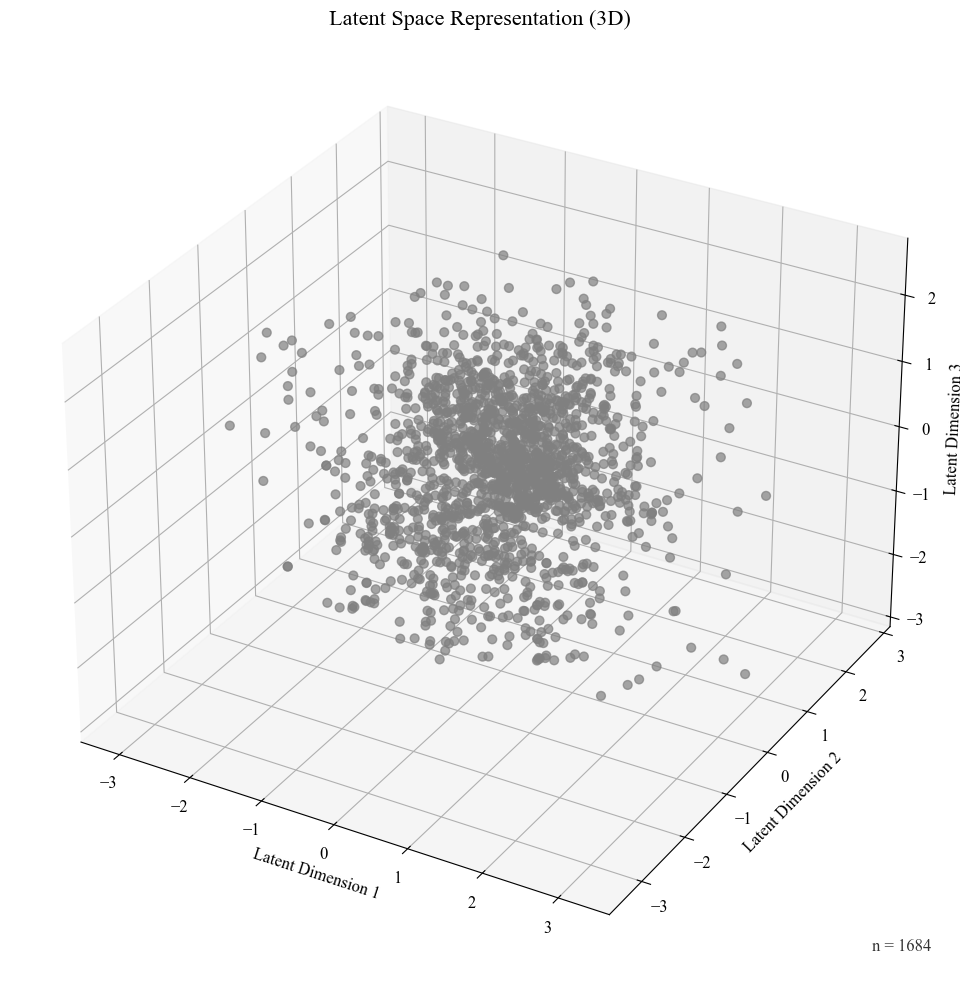

Epochs:  56%|█████▋    | 144/256 [09:34<08:29,  4.55s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 145/256 | Train Loss: 28.0923 | Val Loss: 26.3695


Epochs:  57%|█████▋    | 146/256 [09:42<07:49,  4.27s/it]

Epoch 146/256 | Train Loss: 28.1842 | Val Loss: 26.6631


Epochs:  57%|█████▋    | 147/256 [09:46<07:43,  4.25s/it]

Epoch 147/256 | Train Loss: 28.0082 | Val Loss: 26.7195


Epochs:  58%|█████▊    | 148/256 [09:50<07:30,  4.18s/it]

Epoch 148/256 | Train Loss: 27.9747 | Val Loss: 26.2904


Epochs:  58%|█████▊    | 149/256 [09:54<07:14,  4.06s/it]

Epoch 149/256 | Train Loss: 27.8708 | Val Loss: 26.0438


Epochs:  59%|█████▊    | 150/256 [09:57<07:04,  4.00s/it]

Epoch 150/256 | Train Loss: 27.9127 | Val Loss: 26.5048


Epochs:  59%|█████▉    | 151/256 [10:01<06:51,  3.92s/it]

Epoch 151/256 | Train Loss: 27.8238 | Val Loss: 25.9088


Epochs:  59%|█████▉    | 152/256 [10:05<06:49,  3.93s/it]

Epoch 152/256 | Train Loss: 27.4620 | Val Loss: 26.6053


Epochs:  60%|█████▉    | 153/256 [10:10<07:01,  4.10s/it]

Epoch 153/256 | Train Loss: 27.9177 | Val Loss: 25.9868


Epochs:  60%|██████    | 154/256 [10:14<07:08,  4.21s/it]

Epoch 154/256 | Train Loss: 27.6934 | Val Loss: 26.0049


Epochs:  61%|██████    | 155/256 [10:18<06:49,  4.05s/it]

Epoch 155/256 | Train Loss: 27.6665 | Val Loss: 26.6228


Epochs:  61%|██████    | 156/256 [10:22<06:46,  4.06s/it]

Epoch 156/256 | Train Loss: 27.9805 | Val Loss: 26.1290


Epochs:  61%|██████▏   | 157/256 [10:25<06:25,  3.90s/it]

Epoch 157/256 | Train Loss: 27.6321 | Val Loss: 26.3573


Epochs:  62%|██████▏   | 158/256 [10:29<06:17,  3.85s/it]

Epoch 158/256 | Train Loss: 27.5532 | Val Loss: 26.2114


Epochs:  62%|██████▏   | 159/256 [10:33<06:14,  3.86s/it]

Epoch 159/256 | Train Loss: 27.7634 | Val Loss: 25.9253
Epoch 160/256 | Train Loss: 27.6572 | Val Loss: 26.1195
Generated signals shape: (32, 256)
Epoch 160/256 | Train Loss: 27.6572 | Val Loss: 26.1195
Generated signals shape: (32, 256)


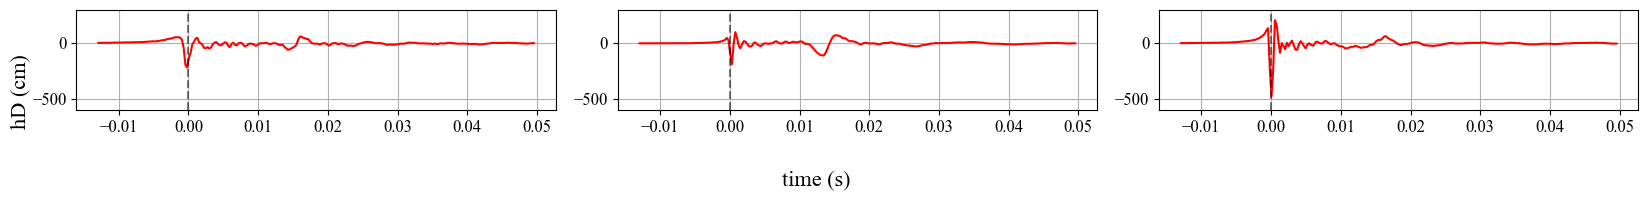

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


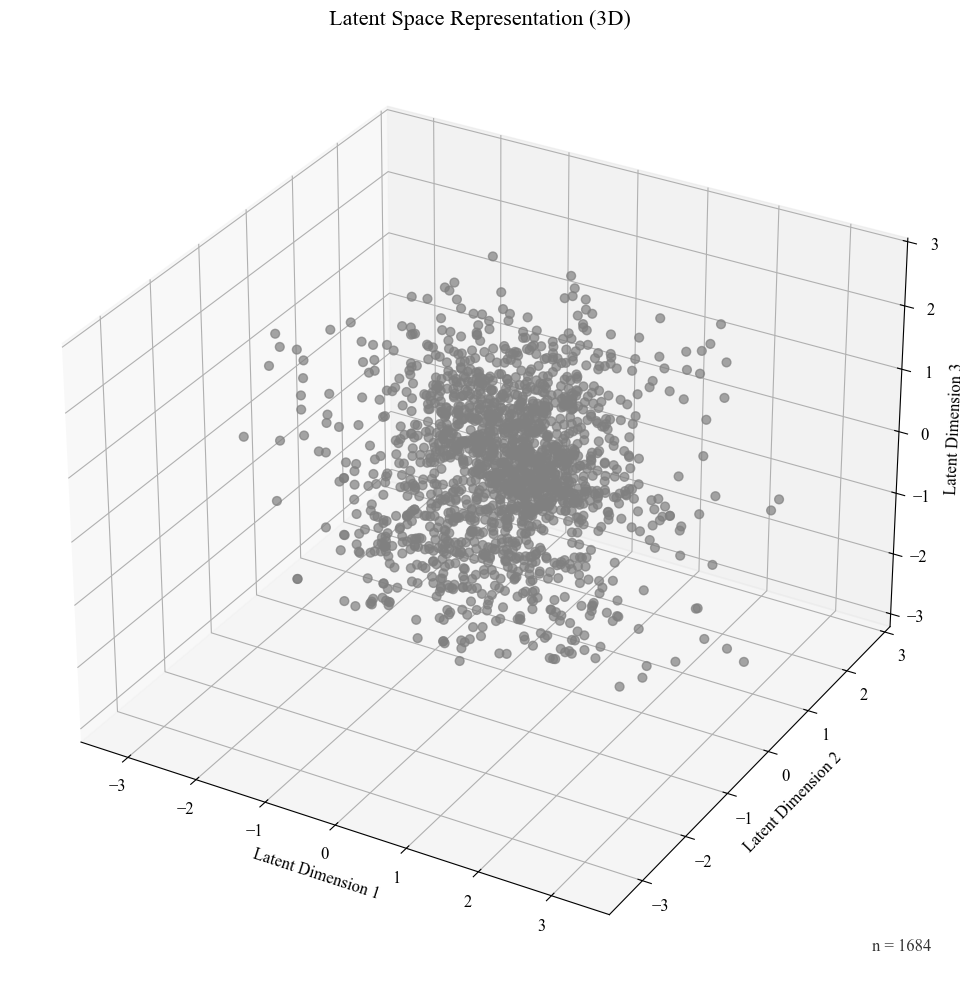

Epochs:  62%|██████▎   | 160/256 [10:39<07:02,  4.40s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 161/256 | Train Loss: 27.8336 | Val Loss: 26.5356


Epochs:  63%|██████▎   | 162/256 [10:46<06:10,  3.95s/it]

Epoch 162/256 | Train Loss: 27.4978 | Val Loss: 26.0177


Epochs:  64%|██████▎   | 163/256 [10:49<05:53,  3.80s/it]

Epoch 163/256 | Train Loss: 26.0223 | Val Loss: 24.2651


Epochs:  64%|██████▍   | 164/256 [10:53<05:45,  3.75s/it]

Epoch 164/256 | Train Loss: 25.6101 | Val Loss: 24.1479


Epochs:  64%|██████▍   | 165/256 [10:57<05:43,  3.78s/it]

Epoch 165/256 | Train Loss: 25.6119 | Val Loss: 24.3871


Epochs:  65%|██████▍   | 166/256 [11:00<05:29,  3.66s/it]

Epoch 166/256 | Train Loss: 25.5055 | Val Loss: 23.9057


Epochs:  65%|██████▌   | 167/256 [11:04<05:27,  3.68s/it]

Epoch 167/256 | Train Loss: 25.3190 | Val Loss: 24.3629


Epochs:  66%|██████▌   | 168/256 [11:08<05:29,  3.75s/it]

Epoch 168/256 | Train Loss: 25.3090 | Val Loss: 24.0793


Epochs:  66%|██████▌   | 169/256 [11:11<05:18,  3.66s/it]

Epoch 169/256 | Train Loss: 25.3549 | Val Loss: 24.1528


Epochs:  66%|██████▋   | 170/256 [11:15<05:20,  3.72s/it]

Epoch 170/256 | Train Loss: 25.2768 | Val Loss: 24.2912


Epochs:  67%|██████▋   | 171/256 [11:19<05:20,  3.77s/it]

Epoch 171/256 | Train Loss: 25.1908 | Val Loss: 24.0177


Epochs:  67%|██████▋   | 172/256 [11:22<05:13,  3.73s/it]

Epoch 172/256 | Train Loss: 25.3849 | Val Loss: 23.9354


Epochs:  68%|██████▊   | 173/256 [11:26<04:58,  3.60s/it]

Epoch 173/256 | Train Loss: 25.2748 | Val Loss: 24.1861


Epochs:  68%|██████▊   | 174/256 [11:30<05:02,  3.69s/it]

Epoch 174/256 | Train Loss: 25.2861 | Val Loss: 23.9682


Epochs:  68%|██████▊   | 175/256 [11:34<05:11,  3.84s/it]

Epoch 175/256 | Train Loss: 25.1564 | Val Loss: 23.7531
Epoch 176/256 | Train Loss: 25.3444 | Val Loss: 23.6744
Generated signals shape: (32, 256)
Epoch 176/256 | Train Loss: 25.3444 | Val Loss: 23.6744
Generated signals shape: (32, 256)


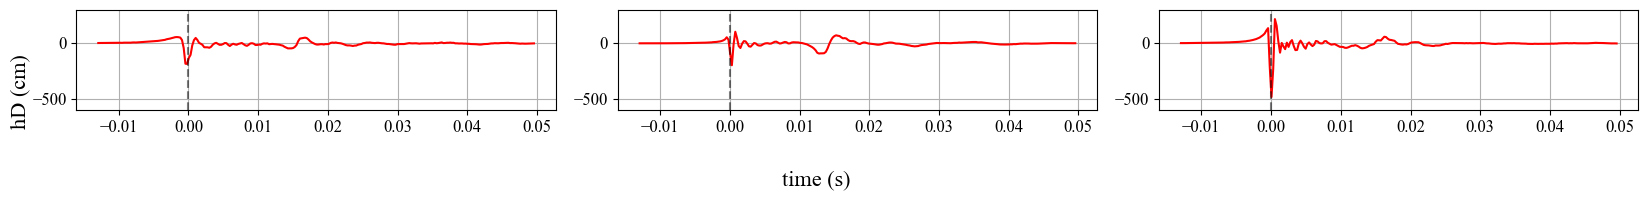

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


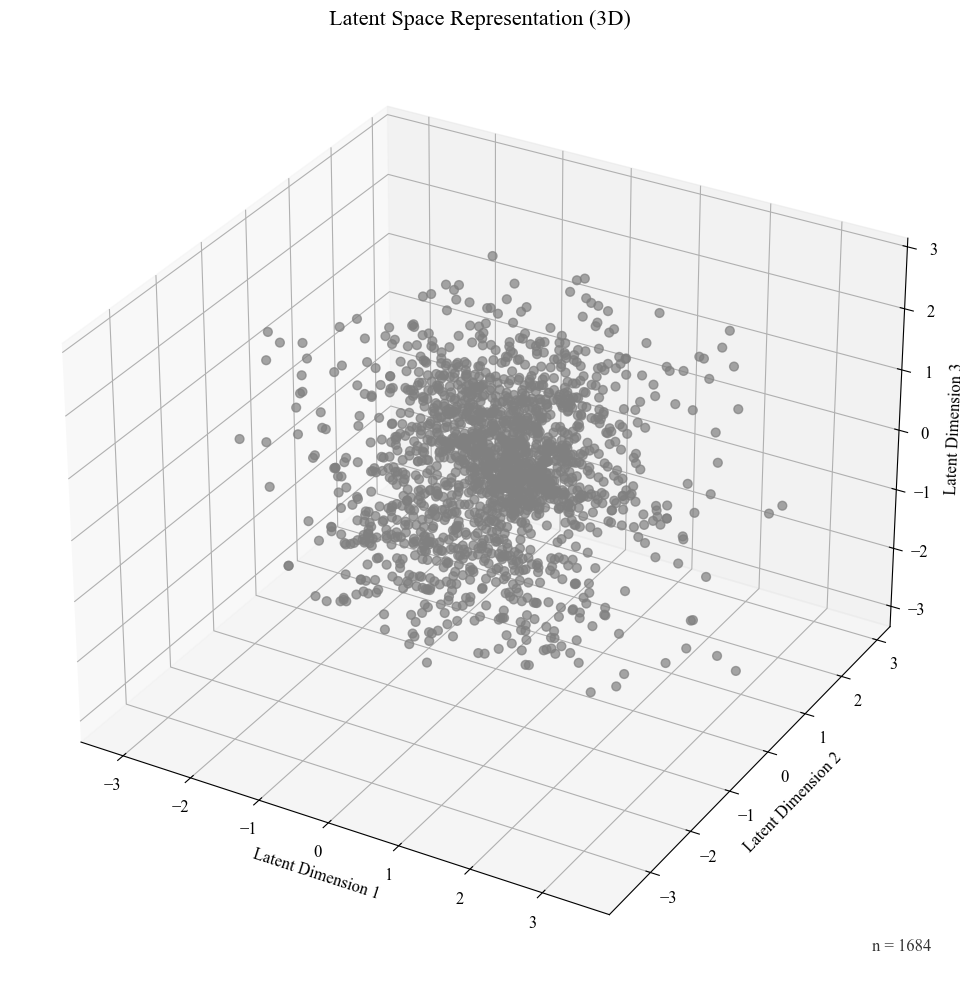

Epochs:  69%|██████▉   | 176/256 [11:42<06:40,  5.01s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 177/256 | Train Loss: 24.9531 | Val Loss: 24.0207


Epochs:  70%|██████▉   | 178/256 [11:49<05:41,  4.37s/it]

Epoch 178/256 | Train Loss: 25.0011 | Val Loss: 23.8237


Epochs:  70%|██████▉   | 179/256 [11:52<05:15,  4.09s/it]

Epoch 179/256 | Train Loss: 25.0929 | Val Loss: 23.7096


Epochs:  70%|███████   | 180/256 [11:56<04:58,  3.93s/it]

Epoch 180/256 | Train Loss: 24.9862 | Val Loss: 23.6460


Epochs:  71%|███████   | 181/256 [12:00<04:58,  3.98s/it]

Epoch 181/256 | Train Loss: 25.1642 | Val Loss: 23.7941


Epochs:  71%|███████   | 182/256 [12:04<04:43,  3.84s/it]

Epoch 182/256 | Train Loss: 25.0009 | Val Loss: 23.4730


Epochs:  71%|███████▏  | 183/256 [12:07<04:40,  3.84s/it]

Epoch 183/256 | Train Loss: 25.1758 | Val Loss: 23.5786


Epochs:  72%|███████▏  | 184/256 [12:11<04:30,  3.76s/it]

Epoch 184/256 | Train Loss: 25.1293 | Val Loss: 23.5687


Epochs:  72%|███████▏  | 185/256 [12:15<04:33,  3.85s/it]

Epoch 185/256 | Train Loss: 24.8507 | Val Loss: 23.5751


Epochs:  73%|███████▎  | 186/256 [12:19<04:20,  3.72s/it]

Epoch 186/256 | Train Loss: 25.0295 | Val Loss: 23.6814


Epochs:  73%|███████▎  | 187/256 [12:22<04:12,  3.65s/it]

Epoch 187/256 | Train Loss: 24.9958 | Val Loss: 23.3451


Epochs:  73%|███████▎  | 188/256 [12:25<04:04,  3.60s/it]

Epoch 188/256 | Train Loss: 25.0597 | Val Loss: 23.5734


Epochs:  74%|███████▍  | 189/256 [12:30<04:13,  3.78s/it]

Epoch 189/256 | Train Loss: 24.9887 | Val Loss: 23.7160


Epochs:  74%|███████▍  | 190/256 [12:33<04:04,  3.71s/it]

Epoch 190/256 | Train Loss: 25.0321 | Val Loss: 23.5750


Epochs:  75%|███████▍  | 191/256 [12:37<04:04,  3.77s/it]

Epoch 191/256 | Train Loss: 25.0173 | Val Loss: 23.7178
Epoch 192/256 | Train Loss: 25.0769 | Val Loss: 23.6961
Generated signals shape: (32, 256)
Epoch 192/256 | Train Loss: 25.0769 | Val Loss: 23.6961
Generated signals shape: (32, 256)


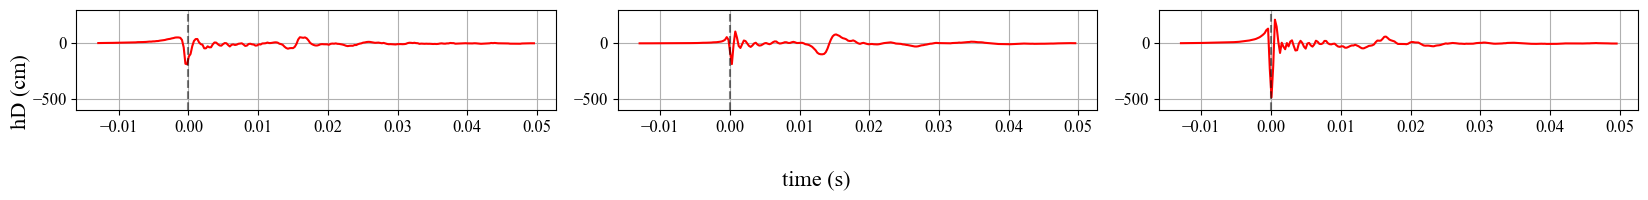

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


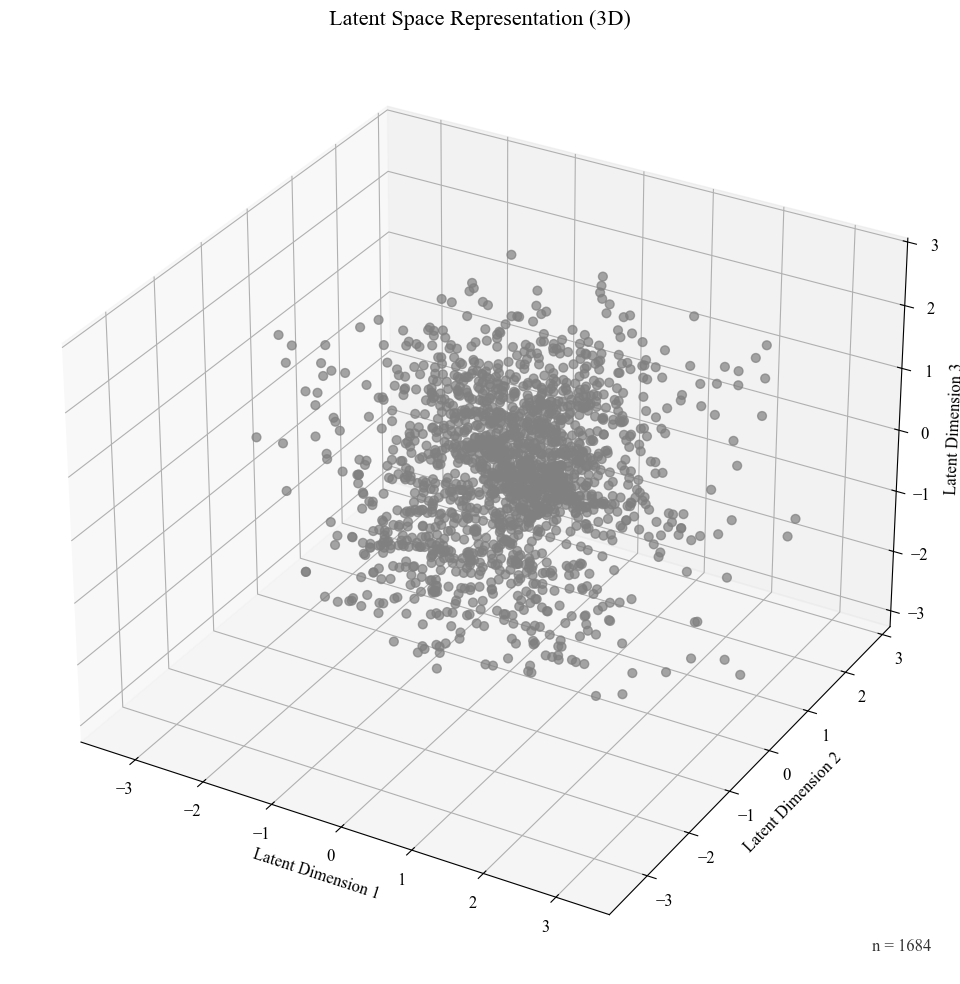

Epochs:  75%|███████▌  | 192/256 [12:44<04:54,  4.61s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 193/256 | Train Loss: 24.9115 | Val Loss: 23.7864


Epochs:  76%|███████▌  | 194/256 [12:50<04:04,  3.95s/it]

Epoch 194/256 | Train Loss: 24.9101 | Val Loss: 23.5084


Epochs:  76%|███████▌  | 195/256 [12:54<04:04,  4.00s/it]

Epoch 195/256 | Train Loss: 24.9870 | Val Loss: 23.4828


Epochs:  77%|███████▋  | 196/256 [12:59<04:01,  4.03s/it]

Epoch 196/256 | Train Loss: 24.9355 | Val Loss: 23.7608


Epochs:  77%|███████▋  | 197/256 [13:02<03:49,  3.89s/it]

Epoch 197/256 | Train Loss: 24.8771 | Val Loss: 23.0829


Epochs:  77%|███████▋  | 198/256 [13:06<03:46,  3.91s/it]

Epoch 198/256 | Train Loss: 24.9312 | Val Loss: 23.6001


Epochs:  78%|███████▊  | 199/256 [13:10<03:35,  3.78s/it]

Epoch 199/256 | Train Loss: 24.7812 | Val Loss: 24.2446


Epochs:  78%|███████▊  | 200/256 [13:13<03:28,  3.72s/it]

Epoch 200/256 | Train Loss: 24.9423 | Val Loss: 23.6536


Epochs:  79%|███████▊  | 201/256 [13:17<03:20,  3.65s/it]

Epoch 201/256 | Train Loss: 24.8068 | Val Loss: 23.6052


Epochs:  79%|███████▉  | 202/256 [13:20<03:14,  3.61s/it]

Epoch 202/256 | Train Loss: 24.8150 | Val Loss: 23.2115


Epochs:  79%|███████▉  | 203/256 [13:25<03:23,  3.84s/it]

Epoch 203/256 | Train Loss: 24.7085 | Val Loss: 23.4470


Epochs:  80%|███████▉  | 204/256 [13:28<03:13,  3.73s/it]

Epoch 204/256 | Train Loss: 24.7069 | Val Loss: 23.5493


Epochs:  80%|████████  | 205/256 [13:32<03:08,  3.69s/it]

Epoch 205/256 | Train Loss: 24.8904 | Val Loss: 23.2467


Epochs:  80%|████████  | 206/256 [13:36<03:14,  3.89s/it]

Epoch 206/256 | Train Loss: 24.8176 | Val Loss: 23.6049


Epochs:  81%|████████  | 207/256 [13:40<03:15,  3.99s/it]

Epoch 207/256 | Train Loss: 24.7636 | Val Loss: 23.5433
Epoch 208/256 | Train Loss: 24.7906 | Val Loss: 23.1697
Generated signals shape: (32, 256)
Epoch 208/256 | Train Loss: 24.7906 | Val Loss: 23.1697
Generated signals shape: (32, 256)


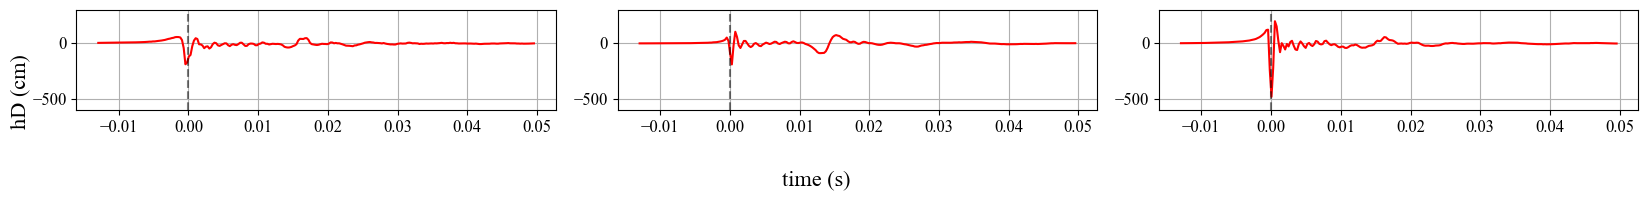

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


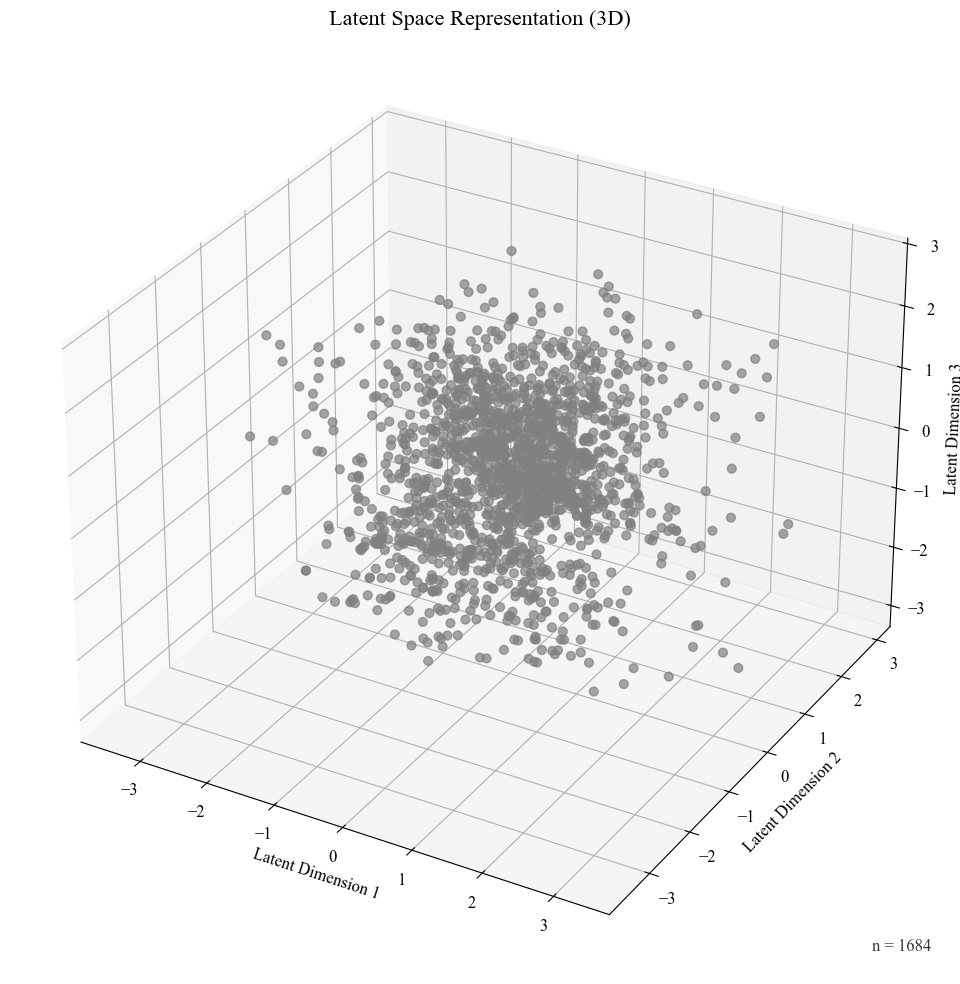

Epochs:  81%|████████▏ | 208/256 [13:46<03:40,  4.60s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 209/256 | Train Loss: 23.9974 | Val Loss: 22.4886


Epochs:  82%|████████▏ | 210/256 [13:53<03:02,  3.96s/it]

Epoch 210/256 | Train Loss: 23.6875 | Val Loss: 22.4744


Epochs:  82%|████████▏ | 211/256 [13:56<02:53,  3.85s/it]

Epoch 211/256 | Train Loss: 23.5729 | Val Loss: 22.4102


Epochs:  83%|████████▎ | 212/256 [14:01<02:54,  3.96s/it]

Epoch 212/256 | Train Loss: 23.6608 | Val Loss: 22.3322


Epochs:  83%|████████▎ | 213/256 [14:05<02:58,  4.14s/it]

Epoch 213/256 | Train Loss: 23.5230 | Val Loss: 22.2474


Epochs:  84%|████████▎ | 214/256 [14:09<02:53,  4.14s/it]

Epoch 214/256 | Train Loss: 23.5653 | Val Loss: 22.2756


Epochs:  84%|████████▍ | 215/256 [14:13<02:41,  3.93s/it]

Epoch 215/256 | Train Loss: 23.6735 | Val Loss: 22.2389


Epochs:  84%|████████▍ | 216/256 [14:16<02:31,  3.78s/it]

Epoch 216/256 | Train Loss: 23.6066 | Val Loss: 22.2832


Epochs:  85%|████████▍ | 217/256 [14:21<02:33,  3.94s/it]

Epoch 217/256 | Train Loss: 23.5895 | Val Loss: 22.3188


Epochs:  85%|████████▌ | 218/256 [14:25<02:35,  4.10s/it]

Epoch 218/256 | Train Loss: 23.4993 | Val Loss: 22.4946


Epochs:  86%|████████▌ | 219/256 [14:29<02:25,  3.93s/it]

Epoch 219/256 | Train Loss: 23.6947 | Val Loss: 22.3145


Epochs:  86%|████████▌ | 220/256 [14:32<02:17,  3.81s/it]

Epoch 220/256 | Train Loss: 23.4923 | Val Loss: 22.2415


Epochs:  86%|████████▋ | 221/256 [14:36<02:10,  3.74s/it]

Epoch 221/256 | Train Loss: 23.5073 | Val Loss: 22.3124


Epochs:  87%|████████▋ | 222/256 [14:39<02:06,  3.71s/it]

Epoch 222/256 | Train Loss: 23.3819 | Val Loss: 22.0275


Epochs:  87%|████████▋ | 223/256 [14:43<02:00,  3.66s/it]

Epoch 223/256 | Train Loss: 23.5035 | Val Loss: 22.1776
Epoch 224/256 | Train Loss: 23.3449 | Val Loss: 22.1580
Generated signals shape: (32, 256)
Epoch 224/256 | Train Loss: 23.3449 | Val Loss: 22.1580
Generated signals shape: (32, 256)


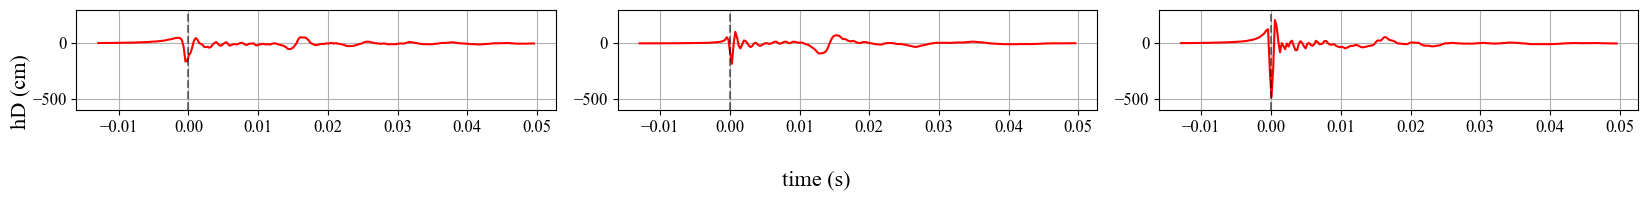

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


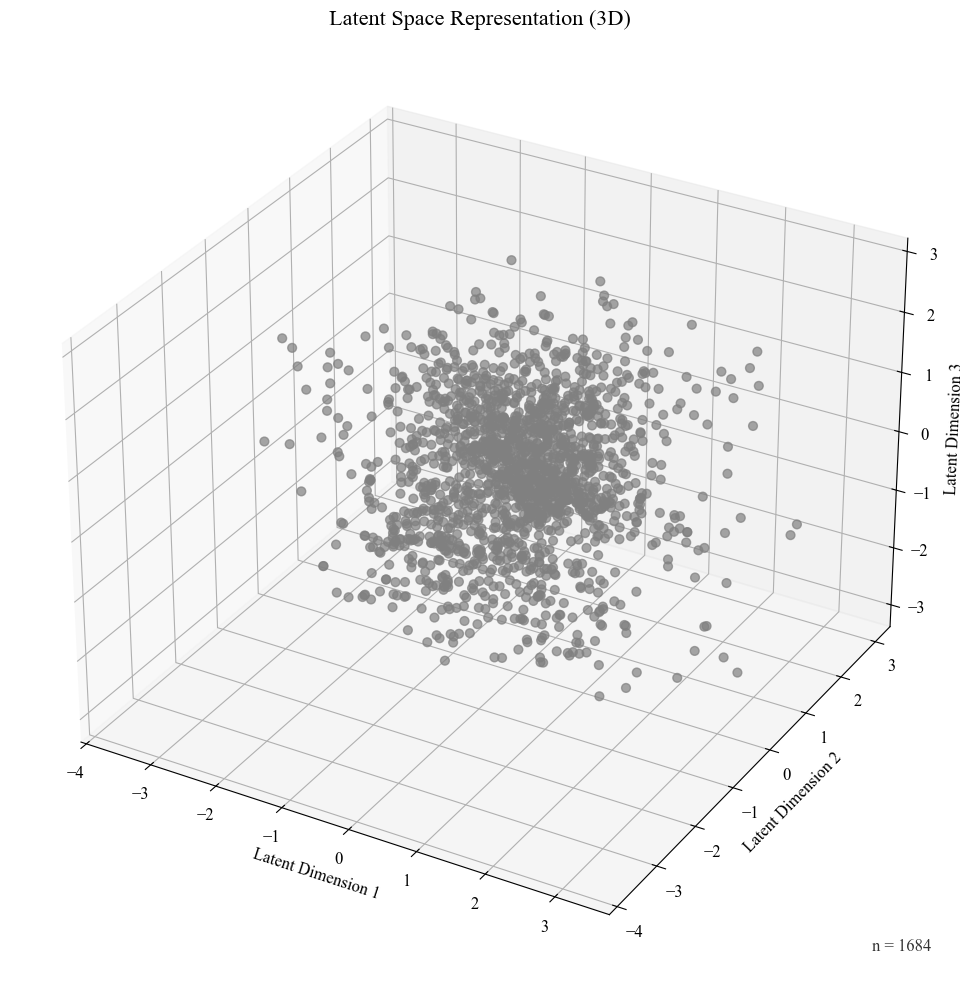

Epochs:  88%|████████▊ | 224/256 [14:49<02:24,  4.51s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 225/256 | Train Loss: 23.3588 | Val Loss: 22.1861


Epochs:  88%|████████▊ | 226/256 [14:56<01:57,  3.91s/it]

Epoch 226/256 | Train Loss: 23.5964 | Val Loss: 22.0494


Epochs:  89%|████████▊ | 227/256 [15:00<01:57,  4.05s/it]

Epoch 227/256 | Train Loss: 23.3879 | Val Loss: 22.1755


Epochs:  89%|████████▉ | 228/256 [15:05<01:58,  4.22s/it]

Epoch 228/256 | Train Loss: 23.4463 | Val Loss: 22.1822


Epochs:  89%|████████▉ | 229/256 [15:09<01:55,  4.27s/it]

Epoch 229/256 | Train Loss: 23.4091 | Val Loss: 22.2854


Epochs:  90%|████████▉ | 230/256 [15:13<01:44,  4.03s/it]

Epoch 230/256 | Train Loss: 23.2122 | Val Loss: 22.0869


Epochs:  90%|█████████ | 231/256 [15:17<01:43,  4.14s/it]

Epoch 231/256 | Train Loss: 23.5521 | Val Loss: 22.1815


Epochs:  91%|█████████ | 232/256 [15:21<01:35,  3.96s/it]

Epoch 232/256 | Train Loss: 23.2195 | Val Loss: 22.1989


Epochs:  91%|█████████ | 233/256 [15:25<01:34,  4.12s/it]

Epoch 233/256 | Train Loss: 23.3288 | Val Loss: 22.2415


Epochs:  91%|█████████▏| 234/256 [15:29<01:26,  3.94s/it]

Epoch 234/256 | Train Loss: 22.9875 | Val Loss: 21.7047


Epochs:  92%|█████████▏| 235/256 [15:33<01:26,  4.10s/it]

Epoch 235/256 | Train Loss: 22.7695 | Val Loss: 21.6588


Epochs:  92%|█████████▏| 236/256 [15:38<01:25,  4.30s/it]

Epoch 236/256 | Train Loss: 22.7853 | Val Loss: 21.6412


Epochs:  93%|█████████▎| 237/256 [15:42<01:21,  4.31s/it]

Epoch 237/256 | Train Loss: 22.7521 | Val Loss: 21.5862


Epochs:  93%|█████████▎| 238/256 [15:47<01:17,  4.33s/it]

Epoch 238/256 | Train Loss: 22.8152 | Val Loss: 21.5004


Epochs:  93%|█████████▎| 239/256 [15:51<01:14,  4.37s/it]

Epoch 239/256 | Train Loss: 22.6591 | Val Loss: 21.5969
Epoch 240/256 | Train Loss: 22.7805 | Val Loss: 21.6132
Generated signals shape: (32, 256)
Epoch 240/256 | Train Loss: 22.7805 | Val Loss: 21.6132
Generated signals shape: (32, 256)


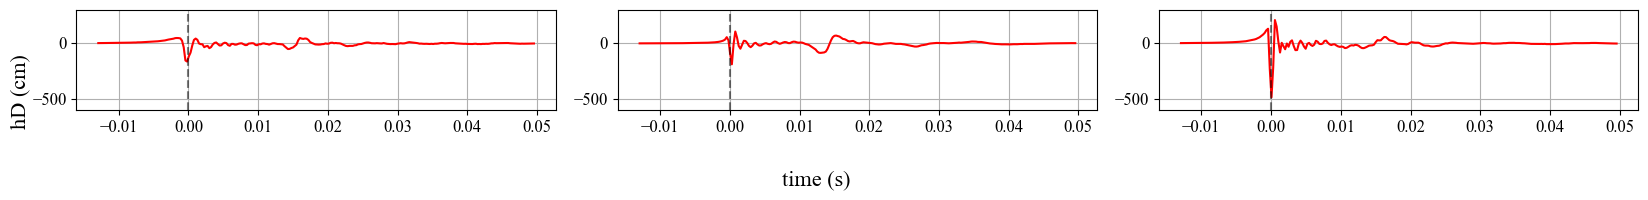

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


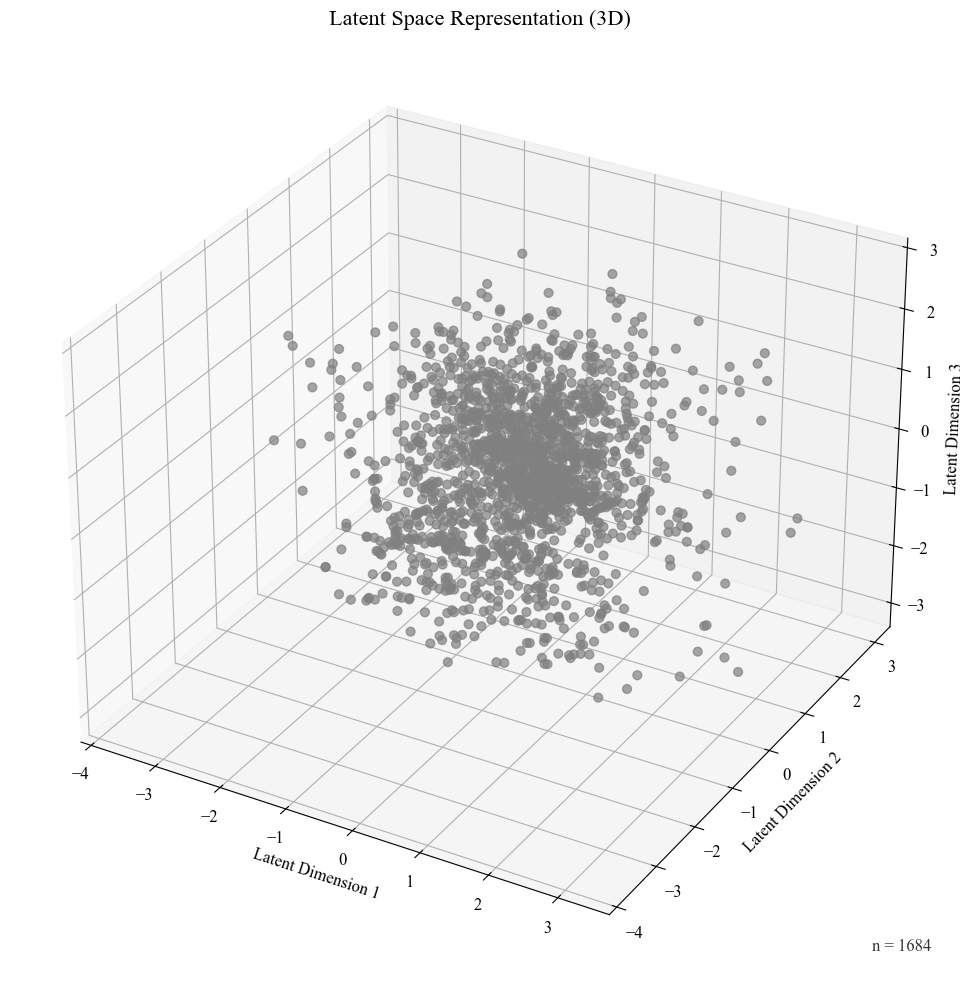

Epochs:  94%|█████████▍| 240/256 [15:58<01:19,  4.96s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 241/256 | Train Loss: 22.6678 | Val Loss: 21.5148


Epochs:  95%|█████████▍| 242/256 [16:05<00:58,  4.21s/it]

Epoch 242/256 | Train Loss: 22.6934 | Val Loss: 21.6883


Epochs:  95%|█████████▍| 243/256 [16:08<00:53,  4.11s/it]

Epoch 243/256 | Train Loss: 22.8202 | Val Loss: 21.6704


Epochs:  95%|█████████▌| 244/256 [16:13<00:51,  4.28s/it]

Epoch 244/256 | Train Loss: 22.7963 | Val Loss: 21.5699


Epochs:  96%|█████████▌| 245/256 [16:18<00:47,  4.35s/it]

Epoch 245/256 | Train Loss: 22.7261 | Val Loss: 21.4735


Epochs:  96%|█████████▌| 246/256 [16:21<00:40,  4.04s/it]

Epoch 246/256 | Train Loss: 22.7416 | Val Loss: 21.4393


Epochs:  96%|█████████▋| 247/256 [16:26<00:37,  4.18s/it]

Epoch 247/256 | Train Loss: 22.7082 | Val Loss: 21.5802


Epochs:  97%|█████████▋| 248/256 [16:29<00:31,  3.93s/it]

Epoch 248/256 | Train Loss: 22.7973 | Val Loss: 21.5764


Epochs:  97%|█████████▋| 249/256 [16:34<00:29,  4.19s/it]

Epoch 249/256 | Train Loss: 22.8010 | Val Loss: 21.3476


Epochs:  98%|█████████▊| 250/256 [16:37<00:23,  3.91s/it]

Epoch 250/256 | Train Loss: 22.8550 | Val Loss: 21.6037


Epochs:  98%|█████████▊| 251/256 [16:41<00:19,  3.82s/it]

Epoch 251/256 | Train Loss: 22.7452 | Val Loss: 21.4986


Epochs:  98%|█████████▊| 252/256 [16:44<00:14,  3.66s/it]

Epoch 252/256 | Train Loss: 22.8205 | Val Loss: 21.4109


Epochs:  99%|█████████▉| 253/256 [16:47<00:10,  3.61s/it]

Epoch 253/256 | Train Loss: 22.8155 | Val Loss: 21.3467


Epochs:  99%|█████████▉| 254/256 [16:51<00:07,  3.51s/it]

Epoch 254/256 | Train Loss: 22.7307 | Val Loss: 21.5539


Epochs: 100%|█████████▉| 255/256 [16:55<00:03,  3.89s/it]

Epoch 255/256 | Train Loss: 22.6679 | Val Loss: 21.4433
Epoch 256/256 | Train Loss: 22.8011 | Val Loss: 21.4572
Generated signals shape: (32, 256)
Epoch 256/256 | Train Loss: 22.8011 | Val Loss: 21.4572
Generated signals shape: (32, 256)


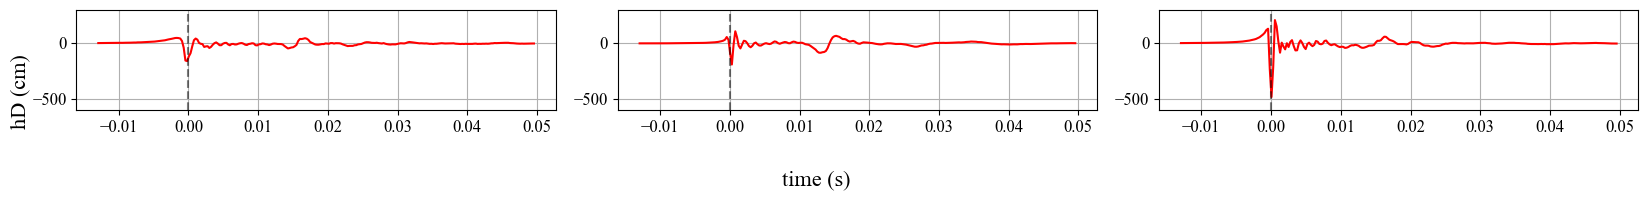

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


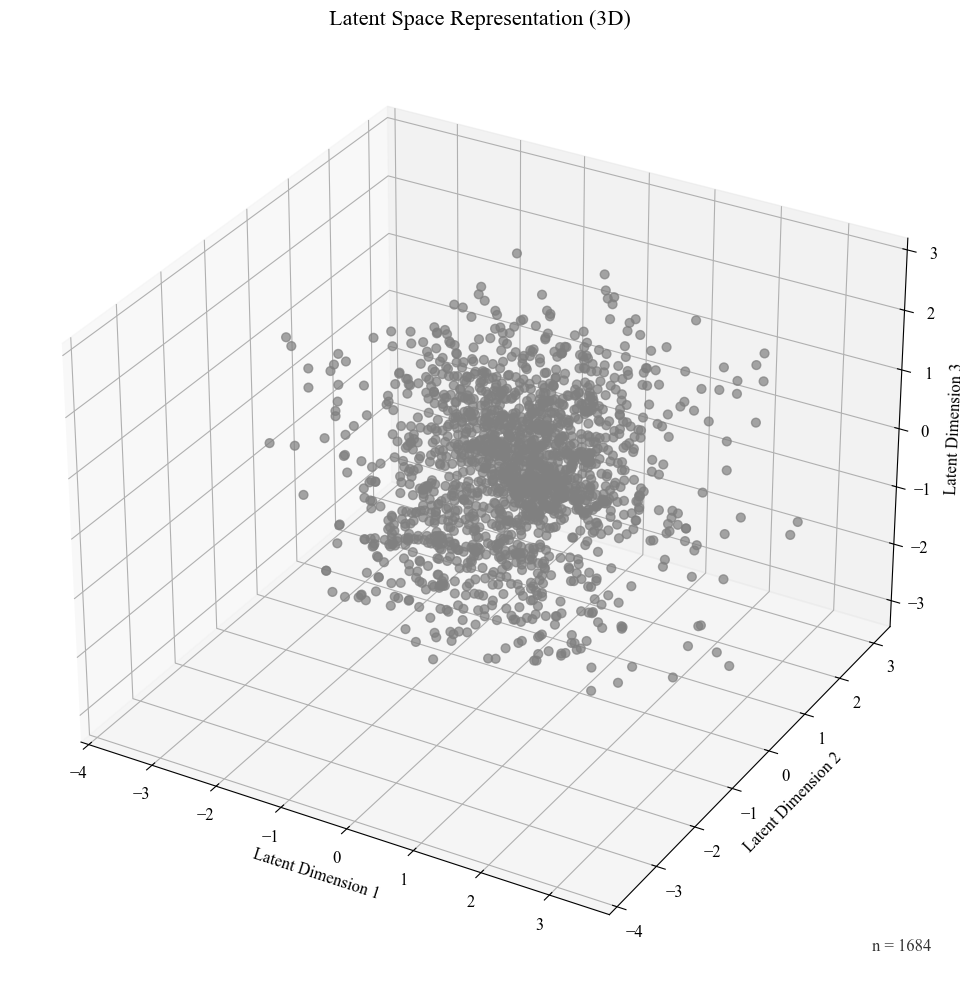

Epochs: 100%|██████████| 256/256 [17:02<00:00,  3.99s/it]

Training Time: 17.04min
Saved VAE model to outdir/generator_weights.pt


In [8]:
vae_trainer = Trainer(toy=toy, noise=True, curriculum=True)
vae_trainer.train()

### Display Results

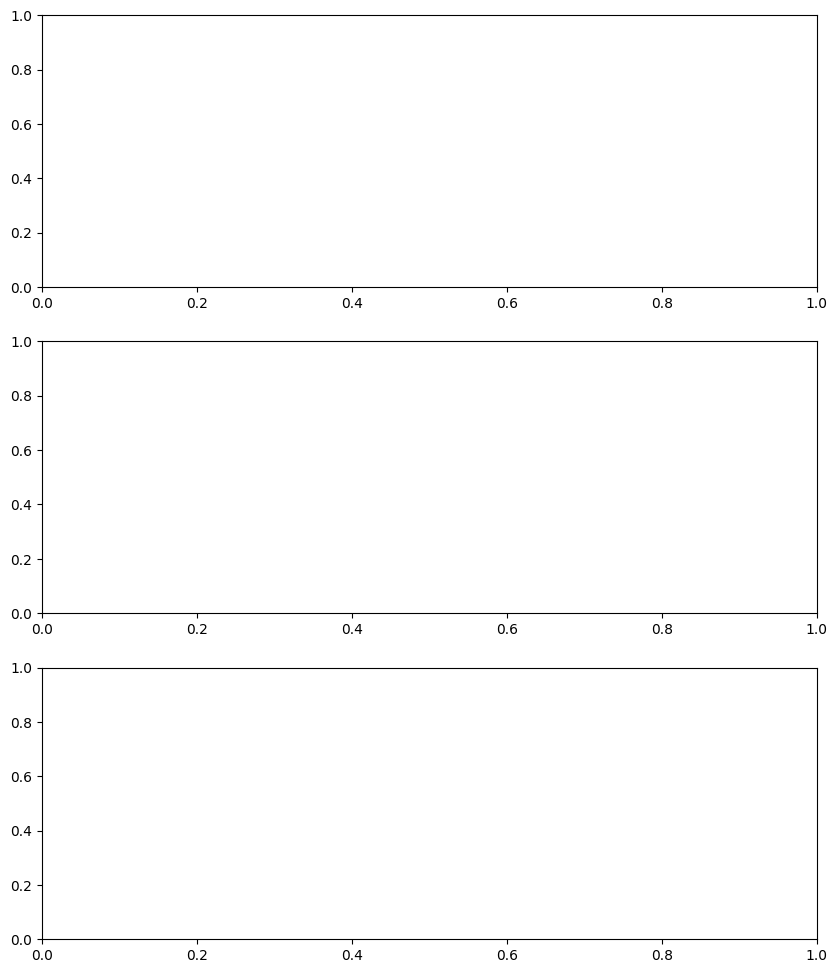

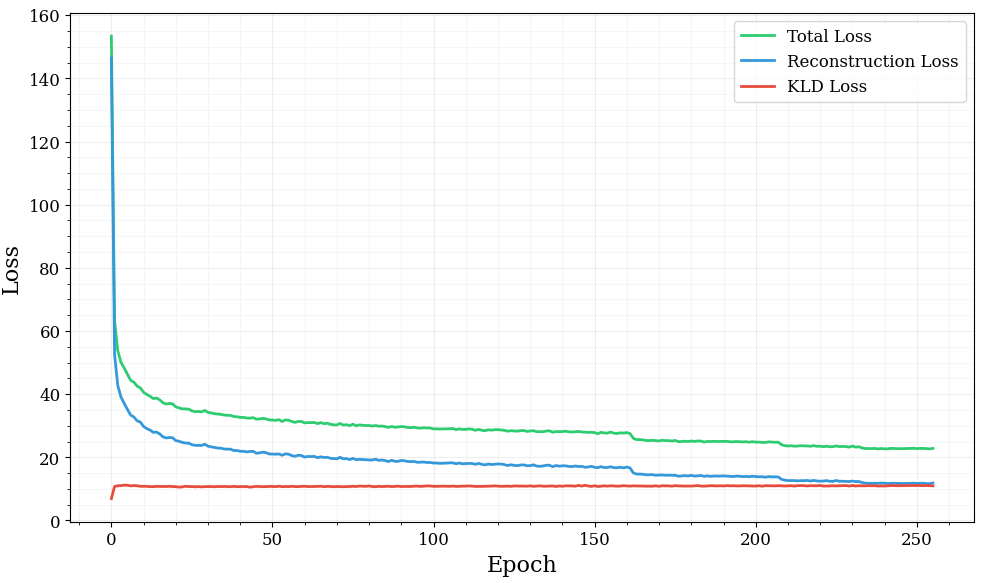

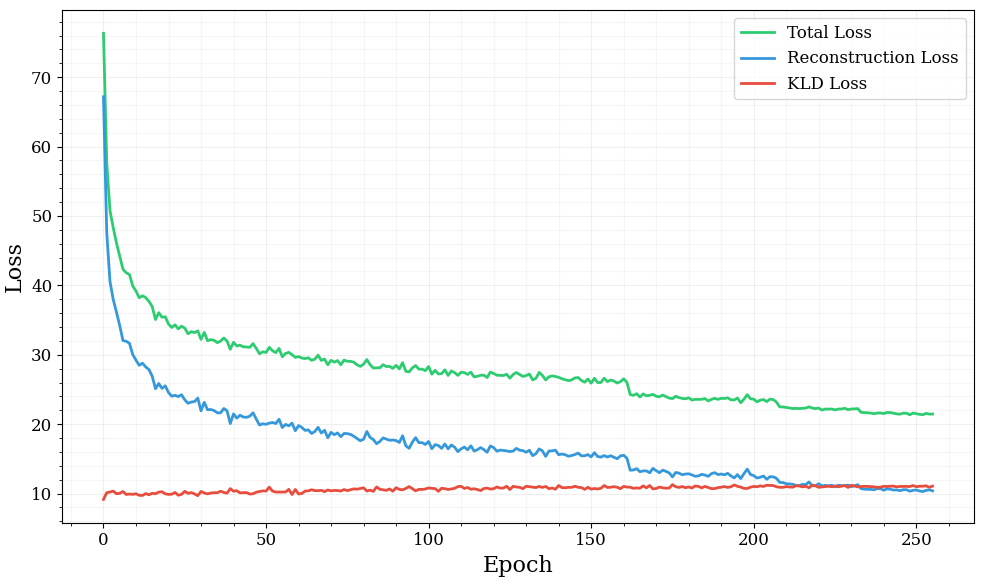

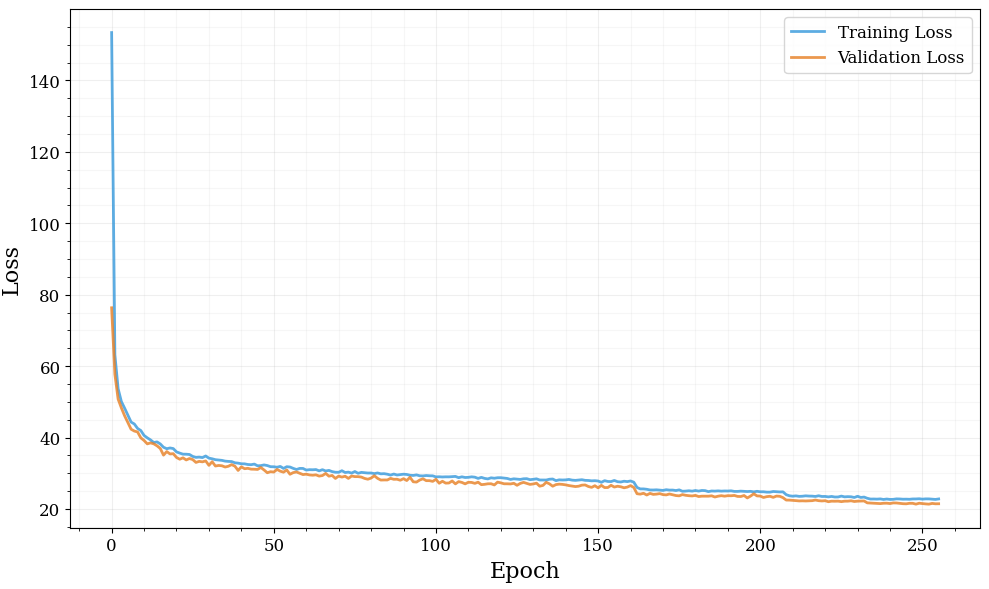

In [9]:
vae_trainer.display_results()

In [10]:
plot_latent_morph_up_and_down(
    vae_trainer.vae,
    signal_1=ccsn_dataset.__getitem__(800)[0],
    signal_2=ccsn_dataset.__getitem__(600)[0],
    max_value=vae_trainer.training_dataset.max_strain,
    train_dataset=CCSNData(),
    steps=1
)

NameError: name 'plot_latent_morph_up_and_down' is not defined

Execution Time: 0.4553678035736084 seconds


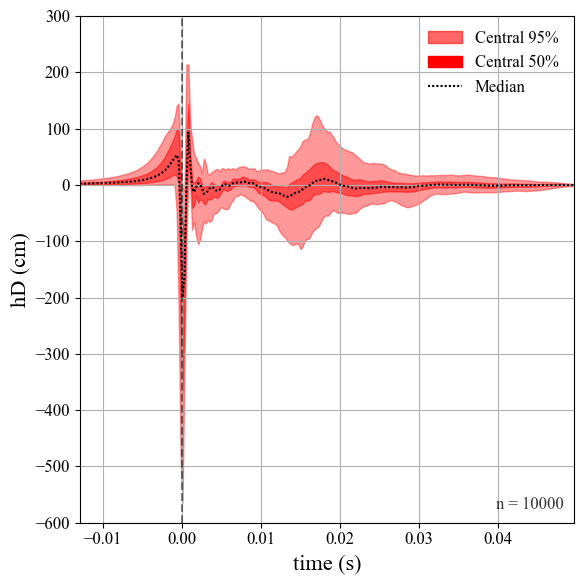

In [11]:
vae_trainer.plot_generated_signal_distribution()

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


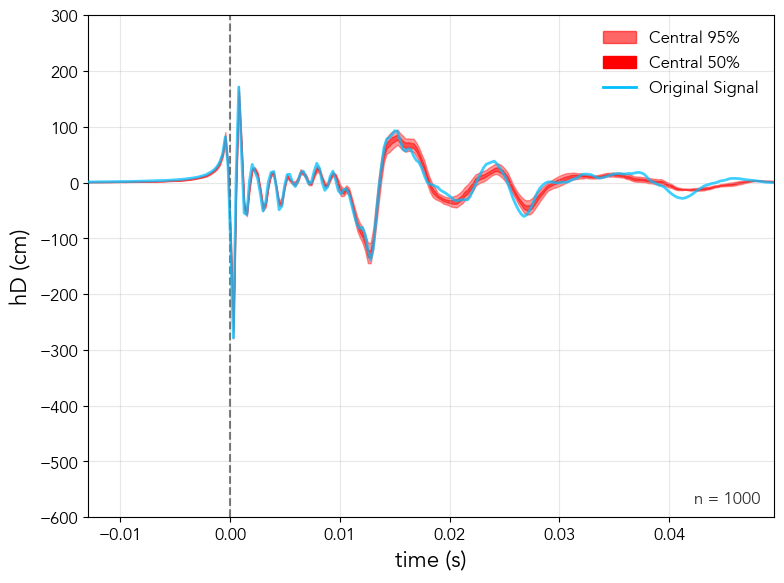

In [12]:
from starccato_flow.plotting.plotting import plot_reconstruction_distribution
plot_reconstruction_distribution(
    vae_trainer.vae,
    signal=vae_trainer.training_dataset.__getitem__(1100)[0],
    max_value=vae_trainer.training_dataset.max_strain,
    num_samples=1000,
    background="white",
    font_family="sans-serif",
    font_name="Avenir",
    fname="plots/ccsn_reconstructions.svg"
)

In [14]:
vae_trainer.save_models()

Saved VAE model to outdir/generator_weights.pt


In [13]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim

from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation

In [ ]:
num_layers = 10
base_dist = StandardNormal(shape=[6])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=6))
    transforms.append(MaskedAffineAutoregressiveTransform(features=6, 
                                                          hidden_features=4))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())

In [ ]:
ccsn_loader = DataLoader(
    CCSNData(noise=True, curriculum=False),
    batch_size=32,
    shuffle=True,
    drop_last=True
)

for epoch in range(10):            
    for batch_idx, (signal, noisy_signal, params) in enumerate(ccsn_loader):
        signal = signal.to(DEVICE)
        noisy_signal = noisy_signal.to(DEVICE)
        vae_trainer.vae.eval()
        with torch.no_grad():
            _, mean, log_var = vae_trainer.vae(signal, noisy_signal, params)
            z = vae_trainer.vae.reparameterize(mean, log_var)
            z = z.detach()
            loss = -flow.log_prob(z).mean()


/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 256])
